<a href="https://colab.research.google.com/github/Medapureddy/Credit-card-Defaulter-project/blob/main/Analyzing_Individual_Preparedness_for_Enhanced_Disaster_Management_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Disaster Simulation for Effective Response Strategies

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/FEMA NHS 2023.csv",encoding="latin-1", header=1)

In [ ]:
data.head()

,id,sample,weight,state,geographic_division,census_region,zipcode,county,dis_prep,dis_soc,...,sex_imputed,education_imputed,race_imputed,disability_imputed,homeownership_imputed,income_imputed,ethnicity_imputed,language,date,time
0,1,Coastal Flooding,0.687800,Washington,Pacific,West,98033,King,Yes,"I am NOT prepared, but I intend to get prepare...",...,No,No,No,No,No,No,No,English,02/02/2023,11:04
1,2,Coastal Flooding,1.225686,Florida,South Atlantic,South,33950,Charlotte,Yes,I have been prepared for MORE than a year and ...,...,No,No,No,No,No,No,No,English,02/02/2023,11:10
2,3,Coastal Flooding,0.728916,New Jersey,Middle Atlantic,Northeast,7031,Bergen,Maybe,I have been prepared for LESS than a year,...,No,No,No,No,No,No,No,English,02/02/2023,10:58
3,4,Coastal Flooding,0.999633,Pennsylvania,Middle Atlantic,Northeast,19115,Philadelphia,"Yes, and I have taken steps to prepare",I have been prepared for MORE than a year and ...,...,No,No,No,No,Yes,No,No,English,02/02/2023,10:59
4,5,Coastal Flooding,0.934556,Pennsylvania,Middle Atlantic,Northeast,19148,Philadelphia,"Yes, and I have taken steps to prepare",I have been prepared for LESS than a year,...,No,No,No,No,No,No,No,English,02/02/2023,11:09


In [ ]:
data.shape

(7604, 406)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7604 entries, 0 to 7603
Columns: 406 entries, id to time
dtypes: float64(1), int64(4), object(401)
memory usage: 23.6+ MB


In [ ]:
data.describe()

,id,weight,zipcode,numadult,numchild
count,7604.000000,7604.000000,7604.000000,7604.000000,7604.000000
mean,3802.500000,1.000000,53510.111652,2.342188,0.683062
std,2195.230056,0.715369,31496.235858,1.213261,1.131739
min,1.000000,0.034177,603.000000,1.000000,0.000000
25%,1901.750000,0.556773,29745.000000,2.000000,0.000000
50%,3802.500000,0.832845,49011.000000,2.000000,0.000000
75%,5703.250000,1.228351,85345.000000,3.000000,1.000000
max,7604.000000,4.990069,99901.000000,19.000000,20.000000


In [ ]:
null_columns = data.columns[data.isnull().any()]
null_count = data[null_columns].isnull().sum()

for column in null_columns:
    print(f"Column '{column}' has {null_count[column]} null values.")

Column 'census_region' has 191 null values.
Column 'county' has 12 null values.
Column 'dis_awareness_source_open' has 7302 null values.
Column 'yp_tool_open' has 7453 null values.
Column 'sex_open' has 7598 null values.
Column 'primarylanguage_open' has 7555 null values.
Column 'homeownership_open' has 7387 null values.
Column 'hometype_open' has 7427 null values.
Column 'lgb_orientation_open' has 7594 null values.
Column 'lgb_gender_open' has 7548 null values.
Column 'rel_affiliation_open' has 7400 null values.
Column 'race_selfid_open' has 7247 null values.


# Potential Columns for this Problem Statement
Here are a few considerations:

1. Awareness, Perception, and Experience:
These are crucial variables for understanding the individual's knowledge, beliefs, and past encounters related to earthquakes.

2. Age (given as range):
Age is a good demographic variable. Since the range is not wide, I can convert it into a single representative value (or not) to capture potential age-related trends.

3. Employment and Income:
Employment and income levels can influence an individual's capacity to prepare for earthquakes. These are valuable socioeconomic indicators.

4. Gender, Education, Ethnicity:
These demographic features can be considered for disaster preparedness. They provide insights into different demographic groups' preparedness behaviors.

5. Disability and Care:
These variables are essential for understanding the challenges individuals with disabilities or those providing care may face during earthquakes.

6. Number of adults, number of children:
Household composition is a relevant factor. It might also be useful to explore the age distribution within children for a more detailed analysis.

7. Homeownership:
Homeownership is a socioeconomic indicator and might influence an individual's commitment to earthquake preparedness.

8. Geographic Information:
State, Geographic Division, and County variables capture the geographic distribution and regional aspects of earthquake preparedness.

9. Preparedness:
Our target variable for predictive modeling.


![image-2.png](attachment:image-2.png)

Based on the actions, we can consider the following categorization for each preparedness level:

1. Pre-contemplation (level 1): 'Don't know'
2. Contemplation (level 2): 'None of the actions'
3. Preparation (level 3): 'Assembled or updated supplies', 'Learned my evacuation routes', 'Made a plan'
4. Action (level 4): 'Safeguarded documents', 'Saved for a rainy day', 'Documented and insured property', 'Got involved in my community', 'Made my home safer', 'Planned with neighbors', 'Signed up for alerts and warnings'
5. Maintenance (level 5): 'Practiced emergency drills or habits', 'Tested family communication plan'

In [ ]:
data.columns

Index(['id', 'sample', ' weight ', 'state', 'geographic_division',
       'census_region', 'zipcode', 'county', 'dis_prep', 'dis_soc',
       ...
       'sex_imputed', 'education_imputed', 'race_imputed',
       'disability_imputed', 'homeownership_imputed', 'income_imputed',
       'ethnicity_imputed', 'language', 'date', 'time'],
      dtype='object', length=406)

In [ ]:
# Extracting the columns related to preparedness actions
actions_columns = ['dis_prepactions_a', 'dis_prepactions_b', 'dis_prepactions_c', 'dis_prepactions_d',
                   'dis_prepactions_e', 'dis_prepactions_f', 'dis_prepactions_g', 'dis_prepactions_h',
                   'dis_prepactions_i', 'dis_prepactions_j', 'dis_prepactions_k', 'dis_prepactions_l',
                   'dis_prepactions_m', 'dis_prepactions_n']

# Create a new DataFrame with the relevant columns
actions_data = data[actions_columns]

# Define a function to categorize preparedness levels based on actions taken
def categorize_preparedness(row):
    # Count the number of actions performed by the respondent
    actions_performed = row[(row == 'Assembled or updated supplies') |
                            (row == 'Documented and insured property') |
                            (row == 'Got involved in my community') |
                            (row == 'Learned my evacuation routes') |
                            (row == 'Made a plan') |
                            (row == 'Made my home safer') |
                            (row == 'Planned with neighbors') |
                            (row == 'Practiced emergency drills or habits') |
                            (row == 'Safeguarded documents') |
                            (row == 'Saved for a rainy day') |
                            (row == 'Signed up for alerts and warnings') |
                            (row == 'Tested family communication plan')]

    # Classify the preparedness level based on the number of actions performed
    if len(actions_performed) == 0:
        return 1  # Pre-contemplation
    elif len(actions_performed) == 1:
        return 2  # Contemplation
    elif len(actions_performed) <= 3:
        return 3  # Preparation
    elif len(actions_performed) <= 9:
        return 4  # Action
    else:
        return 5  # Maintenance

In [ ]:
# Identify relevant columns
alerts_columns = [f'dis_prepactions_alerts_{letter}_{number}' for letter in 'abcdef' for number in range(1, 9)]

Assigning weights to different awareness sources depends on their perceived effectiveness in disseminating accurate and actionable information. While the weights can be somewhat subjective, we can consider the following justifications based on common assumptions about the impact of various sources:

1. TV:

Weight: High

Justification: Television is a widely accessible medium with broad coverage. It can effectively reach a large audience and convey information in both visual and auditory formats.

2. Radio:

Weight: Moderate

Justification: Radio is a traditional and accessible source, especially in areas where other forms of communication might be limited. It can reach people across different demographics.

3. Social Media (Twitter, Instagram, Facebook, etc.):

Weight: High

Justification: Social media platforms have become significant sources of information, especially for younger generations. They offer real-time updates, user engagement, and the potential for information to go viral.

4. Online Publications (websites such as Harvard Review, NY Post):

Weight: Moderate to High

Justification: Online publications often provide in-depth and well-researched information. However, their impact may vary based on the credibility of the specific source.

5. Printed Publications (newspapers, magazines):

Weight: Moderate

Justification: While traditional, printed publications can still be influential, their readership has declined. Their impact may be more significant in specific age groups or communities.

6. Personal Network (friends, family, work, or school):

Weight: High

Justification: Recommendations and information from trusted personal connections are often highly influential. People are more likely to take action if they receive advice from those they know and trust.

7. Other (please specify):

Weight: Variable

Justification: This category is broad and may include a range of sources. Weights would depend on the nature and perceived reliability of the specified sources.

8. Don't know:

Weight: Low

Justification: Individuals who don't know the source of their awareness may not have actively sought out information. Therefore, their awareness might be considered less reliable or impactful.

9. Blank:

Weight: Lowest

Justification: Blank responses indicate a lack of engagement with any specific source. These individuals may not be actively seeking or receiving disaster-related information.

In [ ]:
# Extracting the columns related to disaster awareness
awareness_source_columns = ['dis_awareness_source_a', 'dis_awareness_source_b', 'dis_awareness_source_c', 'dis_awareness_source_d', 'dis_awareness_source_e',
                             'dis_awareness_source_f', 'dis_awareness_source_g', 'dis_awareness_source_h']

# Count the number of sources for each individual
data['awareness_source_count'] = data[awareness_source_columns].apply(lambda row: row.value_counts().sum(), axis=1)

# Define weights for each source
source_weights = {
    'TV': 3,
    'Radio': 2,
    'Social Media': 3,
    'Online Publications': 2,
    'Printed Publications': 2,
    'Personal Network': 3,
    'Other': 1,
    "Don't know": 0,
    'Blank': 0
}

# Create a dictionary to map each awareness source to its weight
source_weight_mapping = {source: source_weights.get(source, 0) for source in data[awareness_source_columns].stack().unique()}

# Create a new column for weighted sum based on the types of sources an individual is engaged in
data['awareness_score'] = data[awareness_source_columns].replace(source_weight_mapping).sum(axis=1)

In [ ]:
# Selected columns
selected_columns = ['id', 'state', 'geographic_division', 'census_region', 'zipcode', 'county','dis_prep', 'dis_perception',
                     'dis_exp', 'age', 'employment', 'income', 'sex', 'education', 'ethnicity', 'awareness_score',
                     'disability', 'care', 'numadult', 'numchild', 'homeownership','rurality','socioeconomically_disadvantaged']

# Create a new DataFrame with selected columns
selected_data = data[selected_columns]

# Create a new column indicating registration for alerts
selected_data['registered_for_alerts'] = data[alerts_columns].apply(lambda row: 'Yes' if 'None of the above' not in row.values else 'No', axis=1)

# Add the 'preparedness' column to the new DataFrame
selected_data['preparedness'] = actions_data.apply(categorize_preparedness, axis=1)

# Convert 'preparedness' to categorical type
selected_data['preparedness'] = selected_data['preparedness'].astype('category')

selected_data.head()

,id,state,geographic_division,census_region,zipcode,county,dis_prep,dis_perception,dis_exp,age,...,awareness_score,disability,care,numadult,numchild,homeownership,rurality,socioeconomically_disadvantaged,registered_for_alerts,preparedness
0,1,Washington,Pacific,West,98033,King,Yes,Very likely,Yes,20-29,...,3,No Disability,No,3,1,Own,Urban,Not disadvantaged,Yes,3
1,2,Florida,South Atlantic,South,33950,Charlotte,Yes,Likely,Yes,50-59,...,5,No Disability,No,5,3,Own,Urban,Not disadvantaged,Yes,4
2,3,New Jersey,Middle Atlantic,Northeast,7031,Bergen,Maybe,Very likely,Yes,30-39,...,3,No Disability,No,3,1,Rent,Urban,Not disadvantaged,Yes,3
3,4,Pennsylvania,Middle Atlantic,Northeast,19115,Philadelphia,"Yes, and I have taken steps to prepare",Don't know,No,40-49,...,0,No Disability,No,2,0,Rent,Urban,Not disadvantaged,Yes,3
4,5,Pennsylvania,Middle Atlantic,Northeast,19148,Philadelphia,"Yes, and I have taken steps to prepare",Likely,Yes,30-39,...,0,No Disability,Yes,2,0,Own,Urban,Not disadvantaged,Yes,4


In [ ]:
selected_data.isna().sum()

id                                   0
state                                0
geographic_division                  0
census_region                      191
zipcode                              0
county                              12
dis_prep                             0
dis_perception                       0
dis_exp                              0
age                                  0
employment                           0
income                               0
sex                                  0
education                            0
ethnicity                            0
awareness_score                      0
disability                           0
care                                 0
numadult                             0
numchild                             0
homeownership                        0
rurality                             0
socioeconomically_disadvantaged      0
registered_for_alerts                0
preparedness                         0
dtype: int64

In [ ]:
selected_data['census_region'] = selected_data['census_region'].fillna('Missing')
selected_data['county'] = selected_data['county'].fillna('Missing')

In [ ]:
selected_data.isna().sum()

id                                 0
state                              0
geographic_division                0
census_region                      0
zipcode                            0
county                             0
dis_prep                           0
dis_perception                     0
dis_exp                            0
age                                0
employment                         0
income                             0
sex                                0
education                          0
ethnicity                          0
awareness_score                    0
disability                         0
care                               0
numadult                           0
numchild                           0
homeownership                      0
rurality                           0
socioeconomically_disadvantaged    0
registered_for_alerts              0
preparedness                       0
dtype: int64

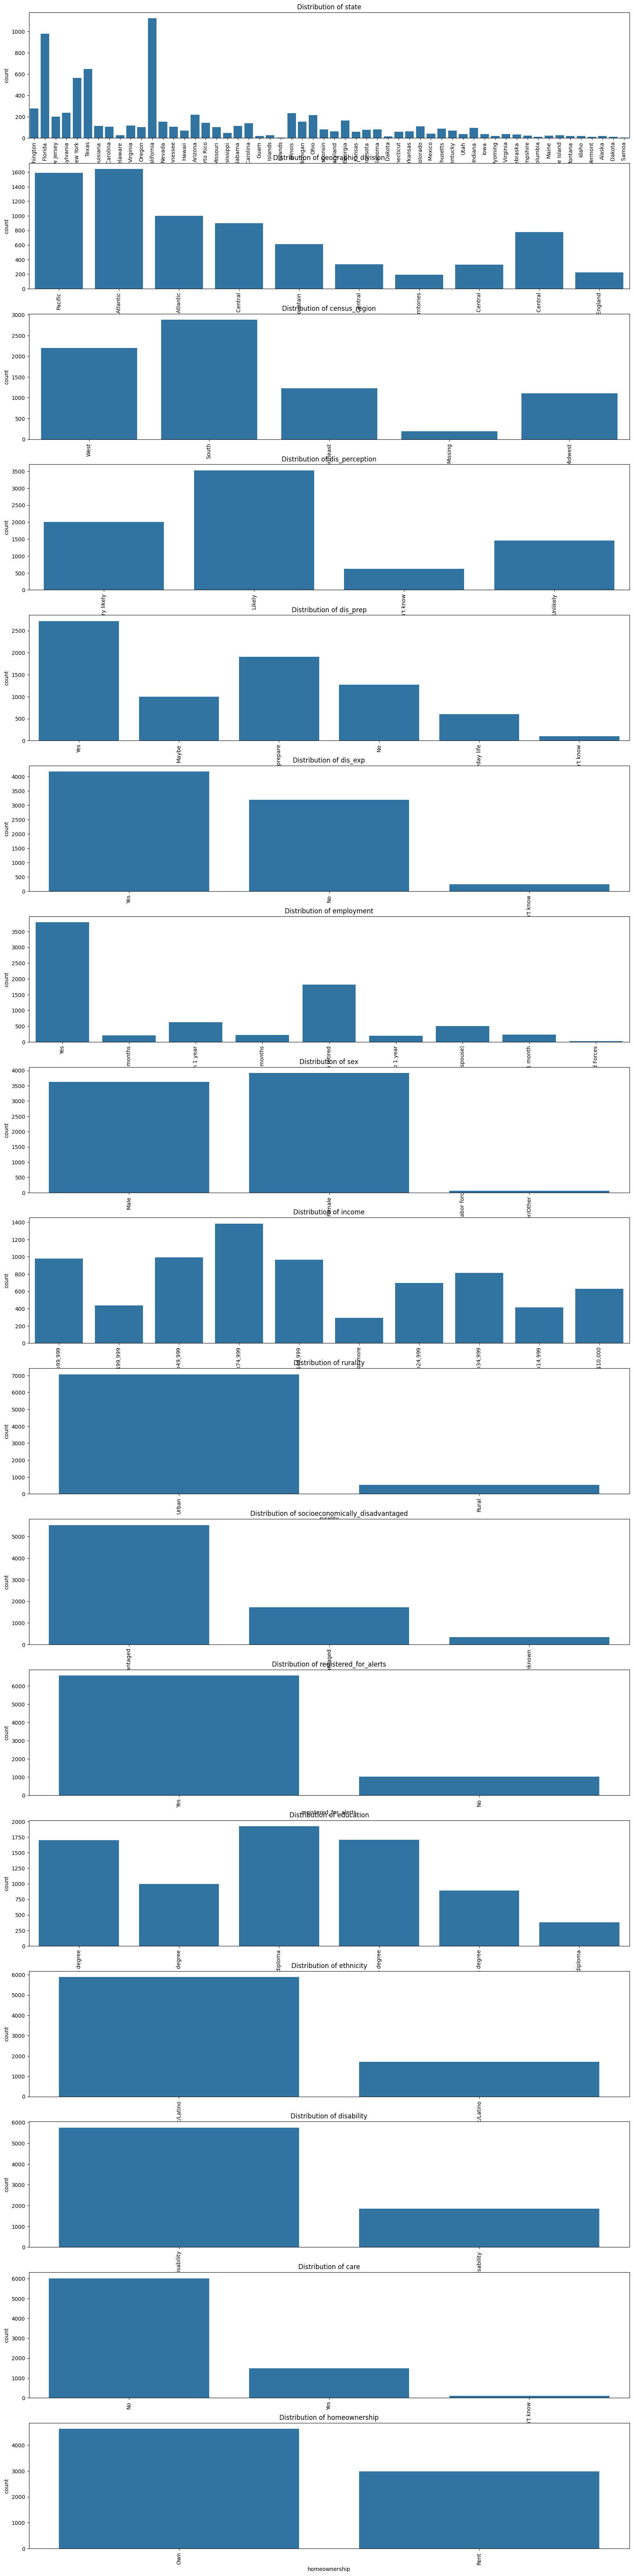

<Figure size 640x480 with 0 Axes>

In [ ]:
# List of categorical columns
categorical_columns = ['state', 'geographic_division', 'census_region','dis_perception', 'dis_prep', 'dis_exp',
                       'employment', 'sex', 'income', 'rurality', 'socioeconomically_disadvantaged', 'registered_for_alerts',
                        'education', 'ethnicity', 'disability', 'care', 'homeownership']

# Set up subplots
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(20, 5 * len(categorical_columns)))

# Plot each categorical variable
for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, data=selected_data, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].tick_params(axis='x', rotation=90)  # Rotate xticks vertically
# Display each plot individually
plt.show()

# Adjust layout
plt.tight_layout()
#plt.show()

In [ ]:
preparedness_counts = selected_data['preparedness'].value_counts()

preparedness_counts

4    2839
3    2243
1    1220
2    1081
5     221
Name: preparedness, dtype: int64

In [ ]:
preparedness_counts = selected_data['preparedness'].value_counts()

# Count of instances
total_instances = len(data)

# Calculate percentage for each class
preparedness_percentage = (preparedness_counts / total_instances) * 100

# Display the counts and percentages
preparedness_summary = pd.DataFrame({
    'Count': preparedness_counts,
    'Percentage': preparedness_percentage
})

print(preparedness_summary)


   Count  Percentage
4   2839   37.335613
3   2243   29.497633
1   1220   16.044187
2   1081   14.216202
5    221    2.906365


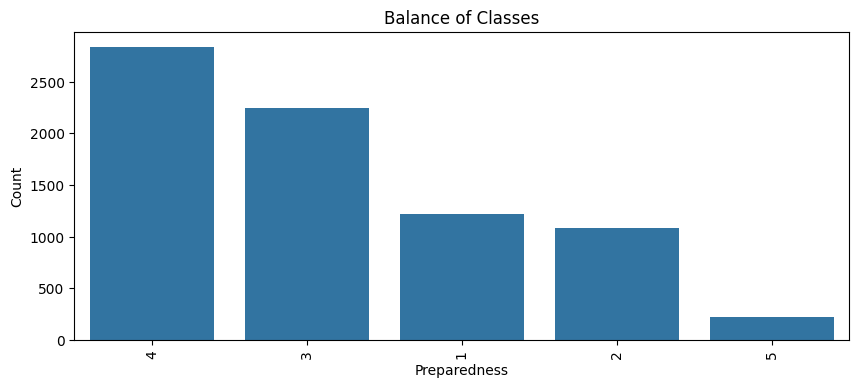

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 4))

# Plot the distribution of 'employment'
sns.countplot(x='preparedness', data=selected_data, order=selected_data['preparedness'].value_counts().index)

# Set labels and title
plt.xlabel('Preparedness')
plt.ylabel('Count')
plt.title('Balance of Classes')
plt.xticks(rotation=90)

# Show the plot
plt.show()

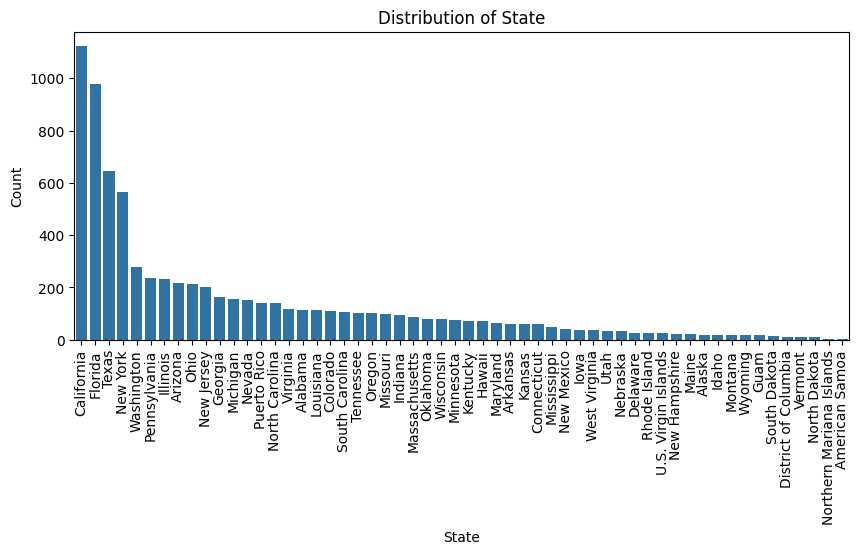

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 4))

# Plot the distribution of 'employment'
sns.countplot(x='state', data=selected_data, order=selected_data['state'].value_counts().index)

# Set labels and title
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Distribution of State')
plt.xticks(rotation=90)

# Show the plot
plt.show()

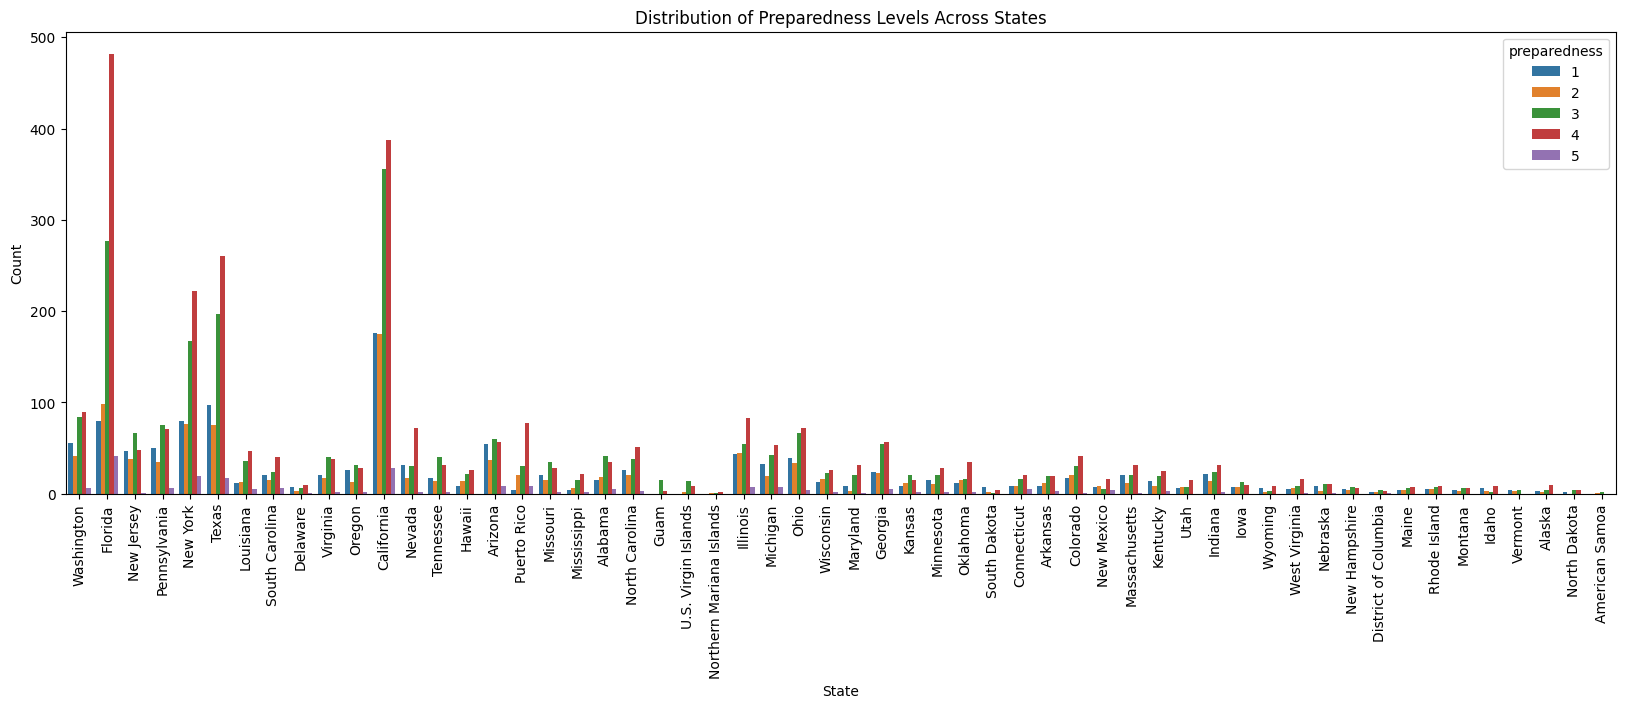

In [ ]:
# Set the figure size
plt.figure(figsize=(20, 6))

# Plot the distribution of preparedness levels across different geographic regions
sns.countplot(x='state', hue='preparedness', data=selected_data)

# Set labels and title
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Distribution of Preparedness Levels Across States')
plt.xticks(rotation=90)

# Show the plot
plt.show()

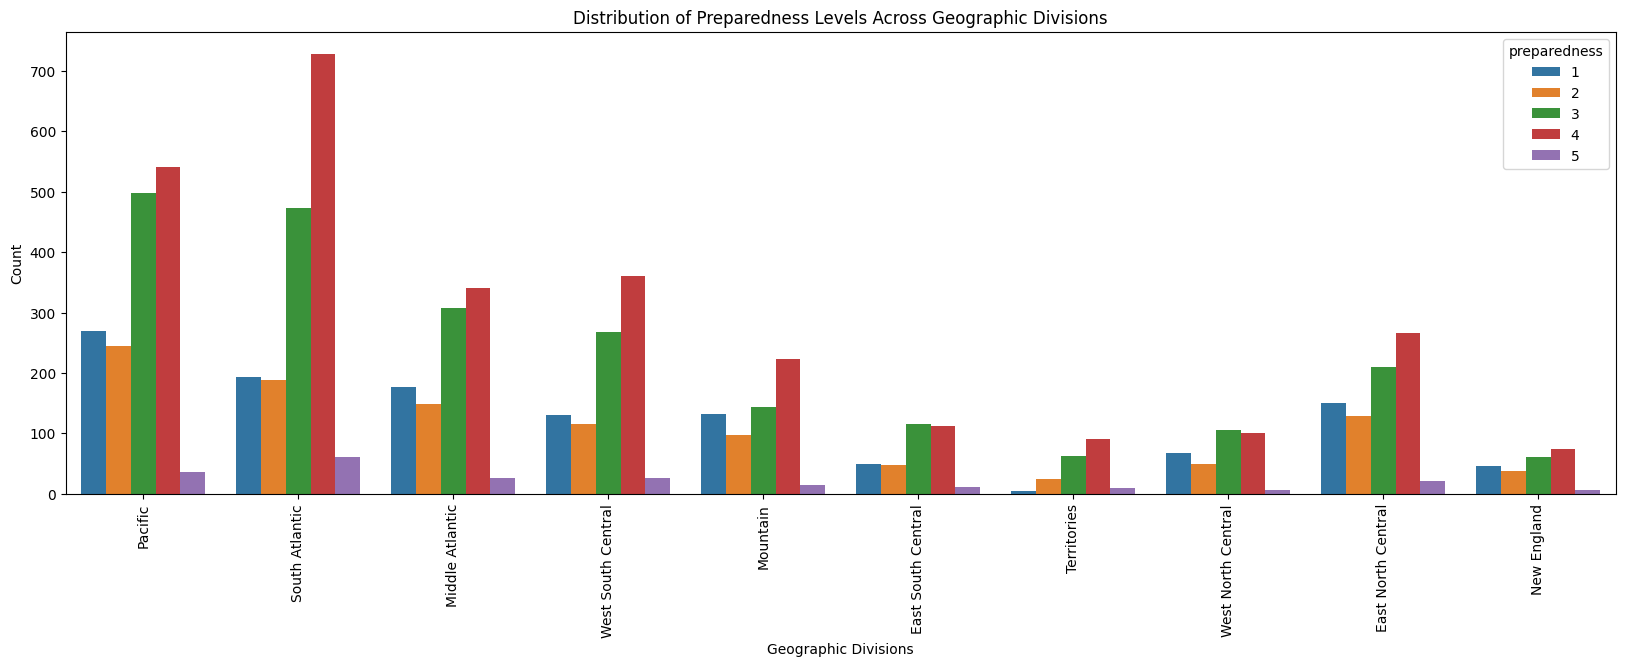

In [ ]:
# Set the figure size
plt.figure(figsize=(20, 6))

# Plot the distribution of preparedness levels across different geographic regions
sns.countplot(x='geographic_division', hue='preparedness', data=selected_data)

# Set labels and title
plt.xlabel('Geographic Divisions')
plt.ylabel('Count')
plt.title('Distribution of Preparedness Levels Across Geographic Divisions')
plt.xticks(rotation=90)

# Show the plot
plt.show()

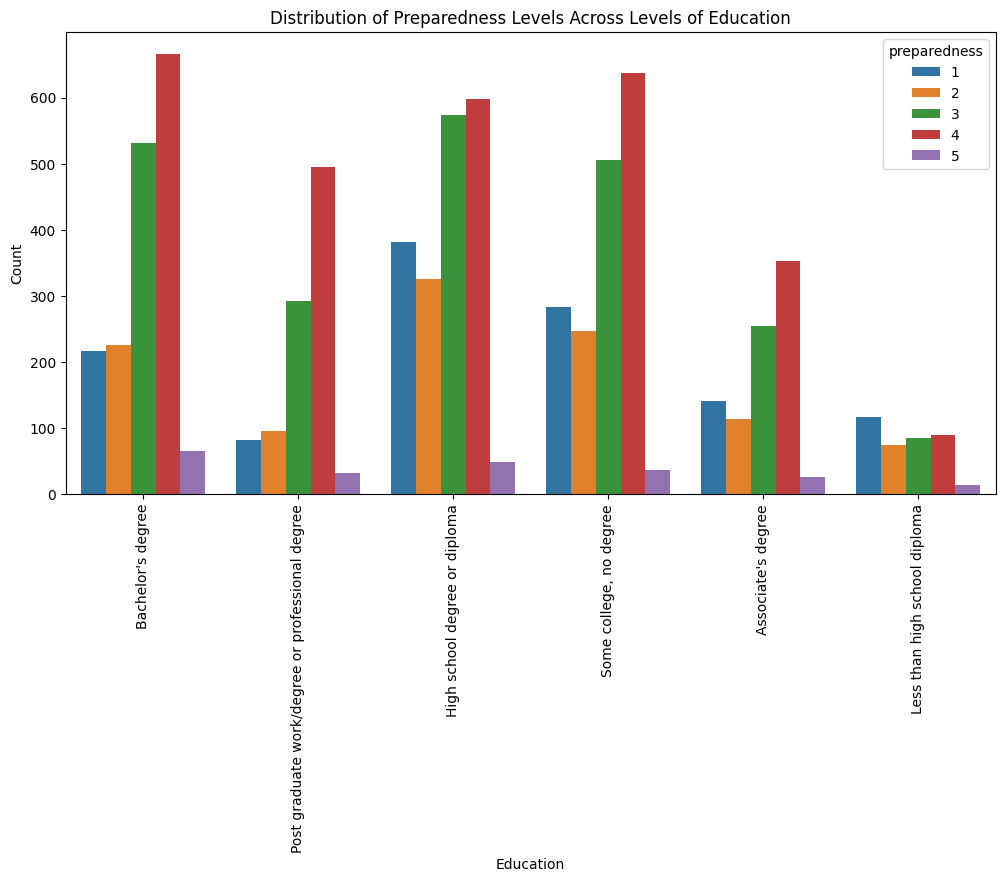

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the distribution of preparedness levels across different geographic regions
sns.countplot(x='education', hue='preparedness', data=selected_data)

# Set labels and title
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Distribution of Preparedness Levels Across Levels of Education')
plt.xticks(rotation=90)

# Show the plot
plt.show()

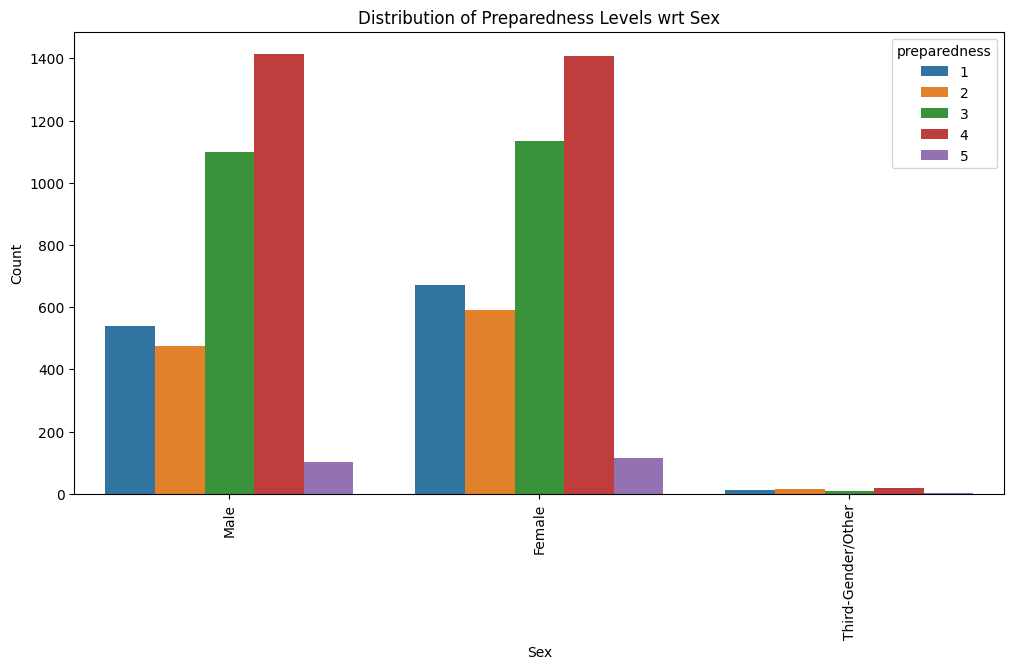

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the distribution of preparedness levels across different geographic regions
sns.countplot(x='sex', hue='preparedness', data=selected_data)

# Set labels and title
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Preparedness Levels wrt Sex')
plt.xticks(rotation=90)

# Show the plot
plt.show()

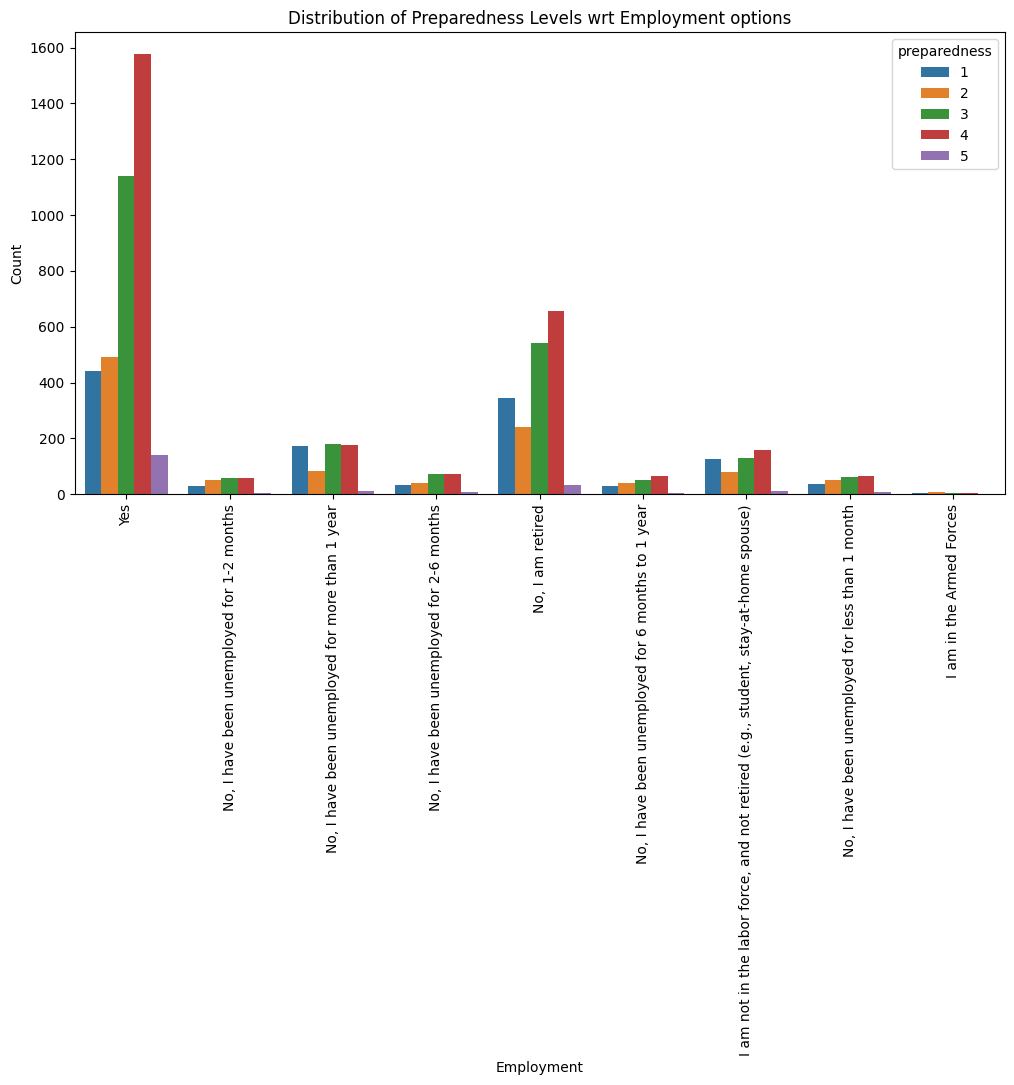

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the distribution of preparedness levels across different geographic regions
sns.countplot(x='employment', hue='preparedness', data=selected_data)

# Set labels and title
plt.xlabel('Employment')
plt.ylabel('Count')
plt.title('Distribution of Preparedness Levels wrt Employment options')
plt.xticks(rotation=90)

# Show the plot
plt.show()

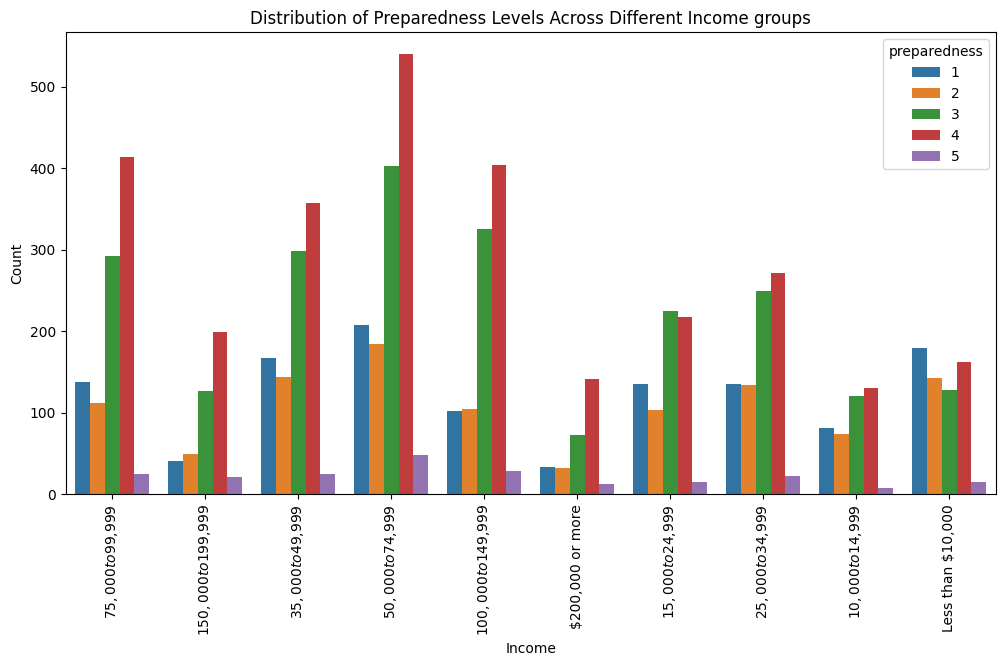

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the distribution of preparedness levels across different geographic regions
sns.countplot(x='income', hue='preparedness', data=selected_data)

# Set labels and title
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Distribution of Preparedness Levels Across Different Income groups')
plt.xticks(rotation=90)

# Show the plot
plt.show()

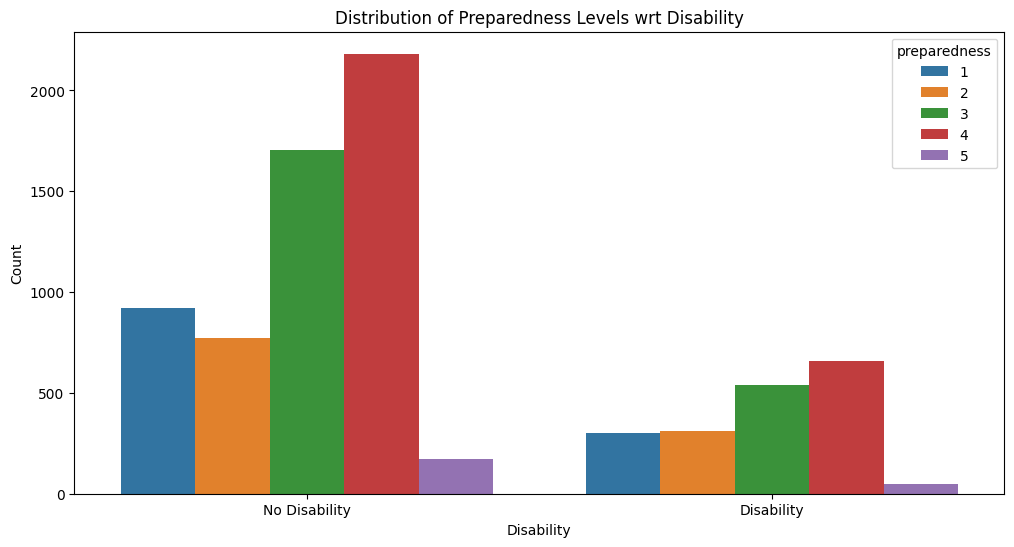

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the distribution of preparedness levels across different geographic regions
sns.countplot(x='disability', hue='preparedness', data=selected_data)

# Set labels and title
plt.xlabel('Disability')
plt.ylabel('Count')
plt.title('Distribution of Preparedness Levels wrt Disability')

# Show the plot
plt.show()

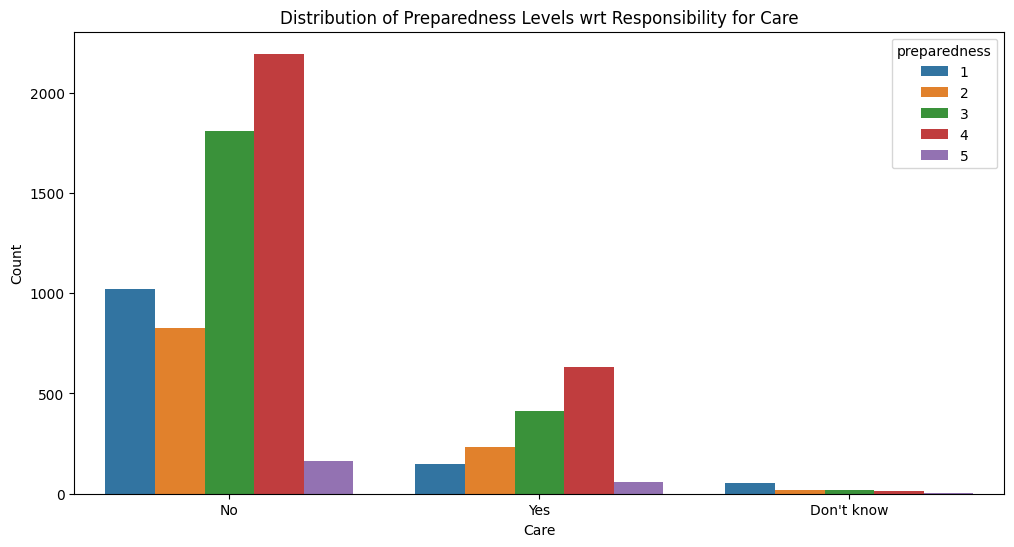

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the distribution of preparedness levels across different geographic regions
sns.countplot(x='care', hue='preparedness', data=selected_data)

# Set labels and title
plt.xlabel('Care')
plt.ylabel('Count')
plt.title('Distribution of Preparedness Levels wrt Responsibility for Care')

# Show the plot
plt.show()

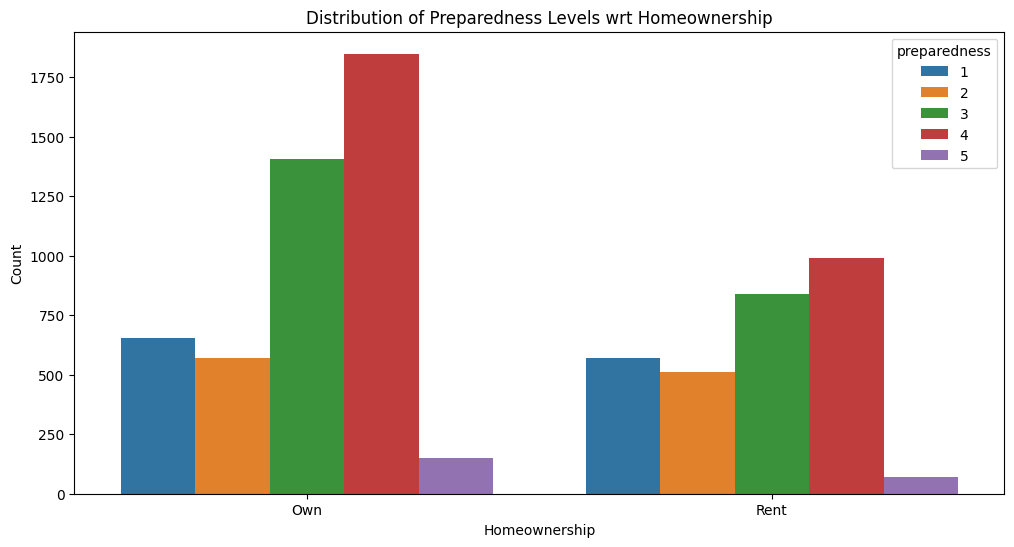

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the distribution of preparedness levels across different geographic regions
sns.countplot(x='homeownership', hue='preparedness', data=selected_data)

# Set labels and title
plt.xlabel('Homeownership')
plt.ylabel('Count')
plt.title('Distribution of Preparedness Levels wrt Homeownership')

# Show the plot
plt.show()

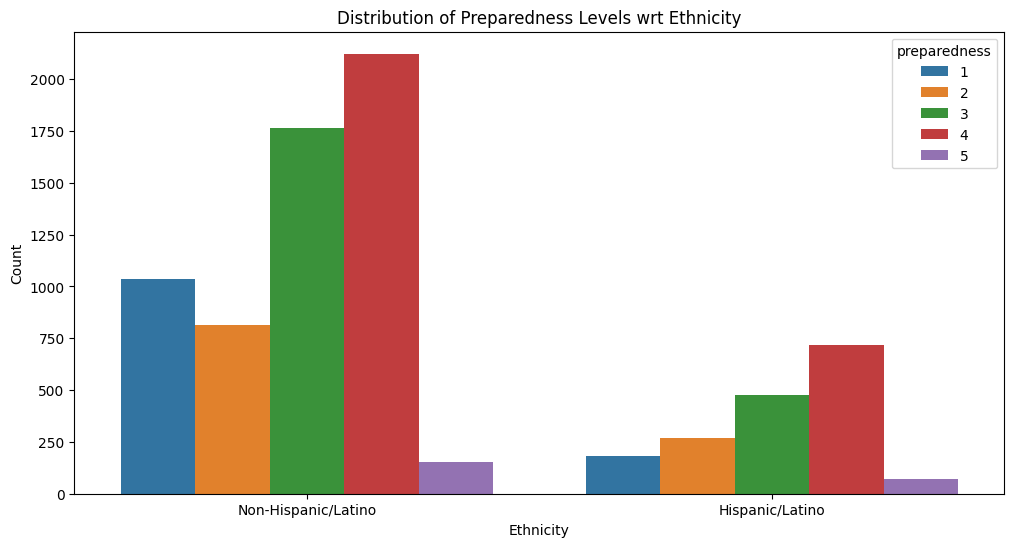

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the distribution of preparedness levels across different geographic regions
sns.countplot(x='ethnicity', hue='preparedness', data=selected_data)

# Set labels and title
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.title('Distribution of Preparedness Levels wrt Ethnicity')

# Show the plot
plt.show()

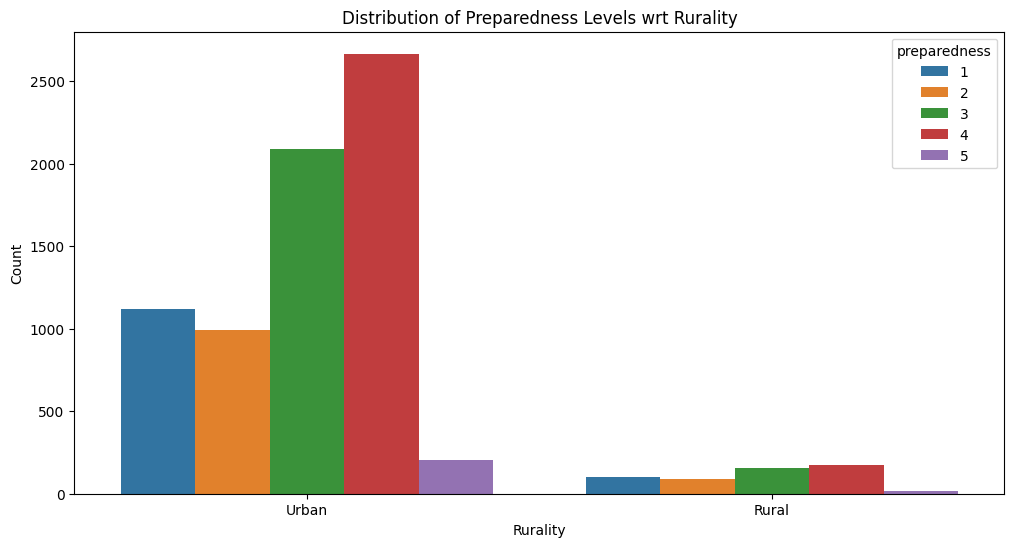

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the distribution of preparedness levels across different geographic regions
sns.countplot(x='rurality', hue='preparedness', data=selected_data)

# Set labels and title
plt.xlabel('Rurality')
plt.ylabel('Count')
plt.title('Distribution of Preparedness Levels wrt Rurality')

# Show the plot
plt.show()

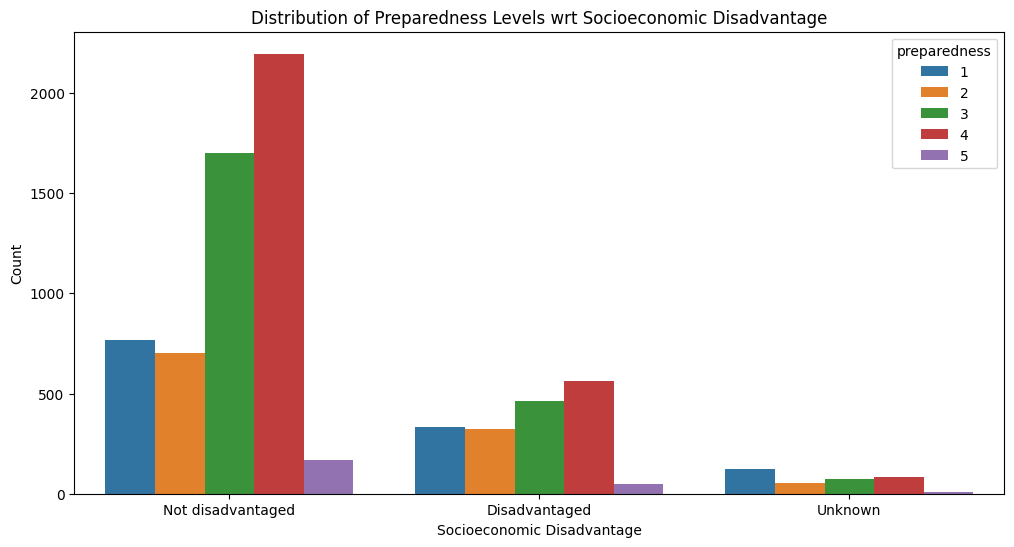

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the distribution of preparedness levels across different geographic regions
sns.countplot(x='socioeconomically_disadvantaged', hue='preparedness', data=selected_data)

# Set labels and title
plt.xlabel('Socioeconomic Disadvantage')
plt.ylabel('Count')
plt.title('Distribution of Preparedness Levels wrt Socioeconomic Disadvantage')

# Show the plot
plt.show()

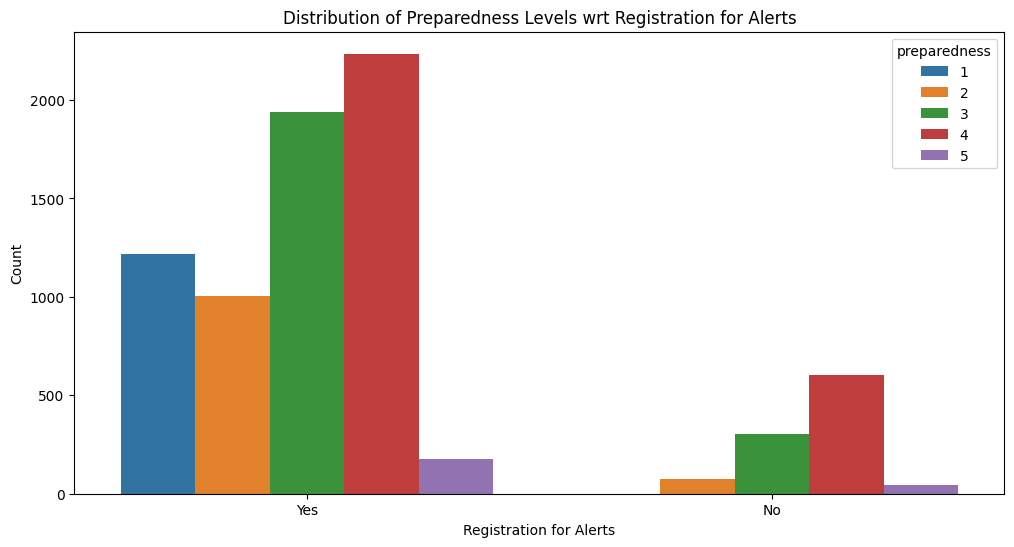

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the distribution of preparedness levels across different geographic regions
sns.countplot(x='registered_for_alerts', hue='preparedness', data=selected_data)

# Set labels and title
plt.xlabel('Registration for Alerts')
plt.ylabel('Count')
plt.title('Distribution of Preparedness Levels wrt Registration for Alerts')

# Show the plot
plt.show()

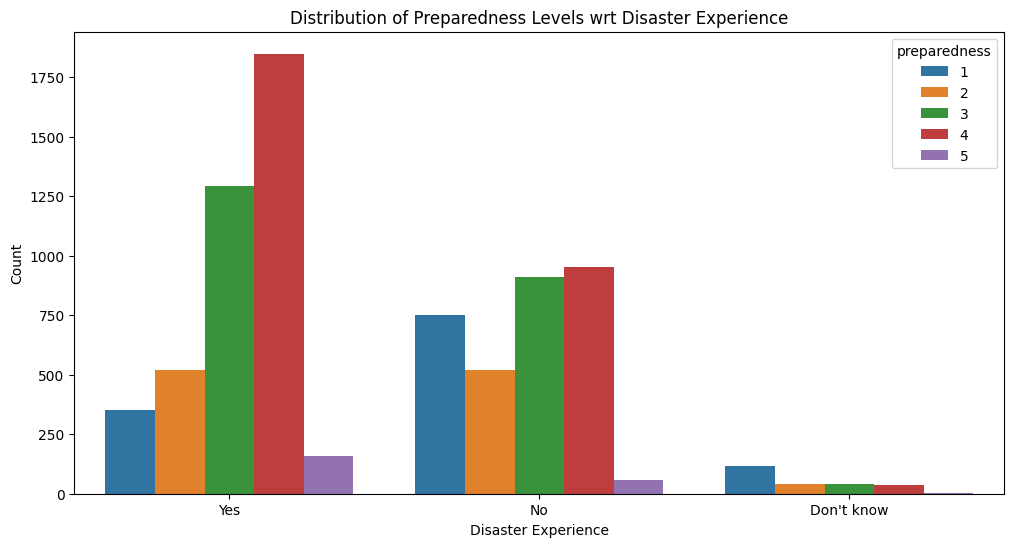

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the distribution of preparedness levels across different geographic regions
sns.countplot(x='dis_exp', hue='preparedness', data=selected_data)

# Set labels and title
plt.xlabel('Disaster Experience')
plt.ylabel('Count')
plt.title('Distribution of Preparedness Levels wrt Disaster Experience')

# Show the plot
plt.show()

### F-score test for all features

In [ ]:
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Extract features and target variable
X = selected_data.drop(['preparedness'], axis=1)
y = selected_data['preparedness']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Exclude 'id' and 'zipcode' from numerical features
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = numerical_cols.difference(['id', 'zipcode'])
X_numerical = X[numerical_cols]

# Extract categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns
X_categorical = X[categorical_cols]

# Include 'id' and 'zipcode' in categorical variables
categorical_cols = categorical_cols.union(['id','zipcode'])
X_categorical = X[categorical_cols]

# Make sure 'id' and 'zipcode' are treated as categorical variables
X_categorical[['id']] = X_categorical[['id']].astype('object')
X_categorical[['zipcode']] = X_categorical[['zipcode']].astype('object')

# Combine numerical and encoded categorical variables
X_encoded = pd.concat([X_numerical, X_categorical], axis=1)

# Apply LabelEncoder to each categorical column
categorical_cols = X.select_dtypes(include=['object']).columns
X_encoded[categorical_cols] = X_encoded[categorical_cols].apply(label_encoder.fit_transform)

# Run F-score test
f_scores, p_values = f_classif(X_encoded, y)

# Create a DataFrame to display results
f_results = pd.DataFrame({'Feature': X_encoded.columns, 'F-Score': f_scores, 'P-Value': p_values})
f_results = f_results.sort_values(by='F-Score', ascending=False)

# Display the results
f_results

,Feature,F-Score,P-Value
9,dis_prep,421.651797,0.000000e+00
0,awareness_score,186.338860,1.361947e-152
7,dis_exp,163.027562,4.209821e-134
18,registered_for_alerts,100.459314,1.794447e-83
8,dis_perception,44.896998,2.539016e-37
2,numchild,27.361927,1.390595e-22
4,care,24.787511,2.030066e-20
15,homeownership,22.373181,2.166835e-18
12,employment,20.525241,7.706160e-17
13,ethnicity,17.063056,6.126864e-14


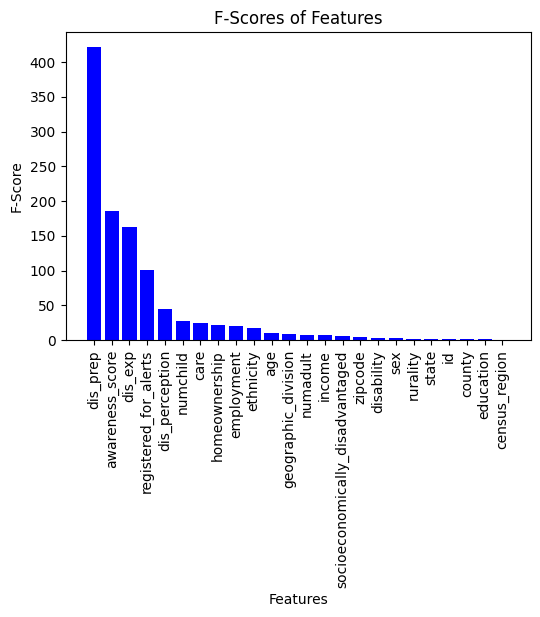

In [ ]:
# Plotting
plt.figure(figsize=(6, 4))
plt.bar(f_results['Feature'], f_results['F-Score'], color='blue')
plt.xlabel('Features')
plt.ylabel('F-Score')
plt.title('F-Scores of Features')
plt.xticks(rotation=90)
plt.show()

**dis_prep, awareness_score, dis_exp, registered_for_alerts:** These features have extremely low p-values, indicating high statistical significance. They are likely to be important predictors.

**numchild, care, dis_perception, homeownership:** These features also have low p-values, suggesting they are statistically significant.

**census_region, county, id, education, state:** These features have higher p-values, indicating that they may not be as statistically significant in predicting the target variable.

### Mutual Information score for all features

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Define a dictionary to store mappings between original labels and encoded values
label_encodings = {}

# Extract features and target variable
X = selected_data.drop(['id', 'preparedness'], axis=1)
y = selected_data['preparedness']

# Exclude 'id' and 'zipcode' from numerical features
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = numerical_cols.difference(['zipcode'])
X_numerical = X[numerical_cols]

# Extract categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns
categorical_cols = categorical_cols.union(['zipcode'])
# Label encode categorical variables
for col in categorical_cols:
    label_encoder = LabelEncoder()
    X_categorical[col] = label_encoder.fit_transform(X_categorical[col])
    # Store the mapping for decoding
    label_encodings[col] = {val: label for label, val in enumerate(label_encoder.classes_)}

# Make sure 'id' and 'zipcode' are treated as categorical variables
#X_categorical[['zipcode']] = X_categorical[['zipcode']].astype('object')

# Label encode categorical variables
#label_encoder = LabelEncoder()
X_categorical_encoded = X_categorical.apply(label_encoder.fit_transform)

# Combine numerical and encoded categorical variables
X_encoded = pd.concat([X_numerical, X_categorical_encoded], axis=1)

# Compute mutual information
mi_scores = mutual_info_classif(X_encoded, y)

# Create a DataFrame to display results
mi_results = pd.DataFrame({'Feature': X_encoded.columns, 'Mutual Information': mi_scores})
mi_results = mi_results.sort_values(by='Mutual Information', ascending=False)

# Display the results
print(mi_results)

                            Feature  Mutual Information
9                          dis_prep            0.124390
0                   awareness_score            0.043803
8                    dis_perception            0.040974
18            registered_for_alerts            0.040647
7                           dis_exp            0.032767
2                          numchild            0.017864
4                              care            0.014720
19                         rurality            0.011148
1                          numadult            0.011020
15                    homeownership            0.010899
11                        education            0.008737
5                     census_region            0.006958
20                              sex            0.006215
12                       employment            0.004611
17                           income            0.004339
13                        ethnicity            0.003054
3                               age            0

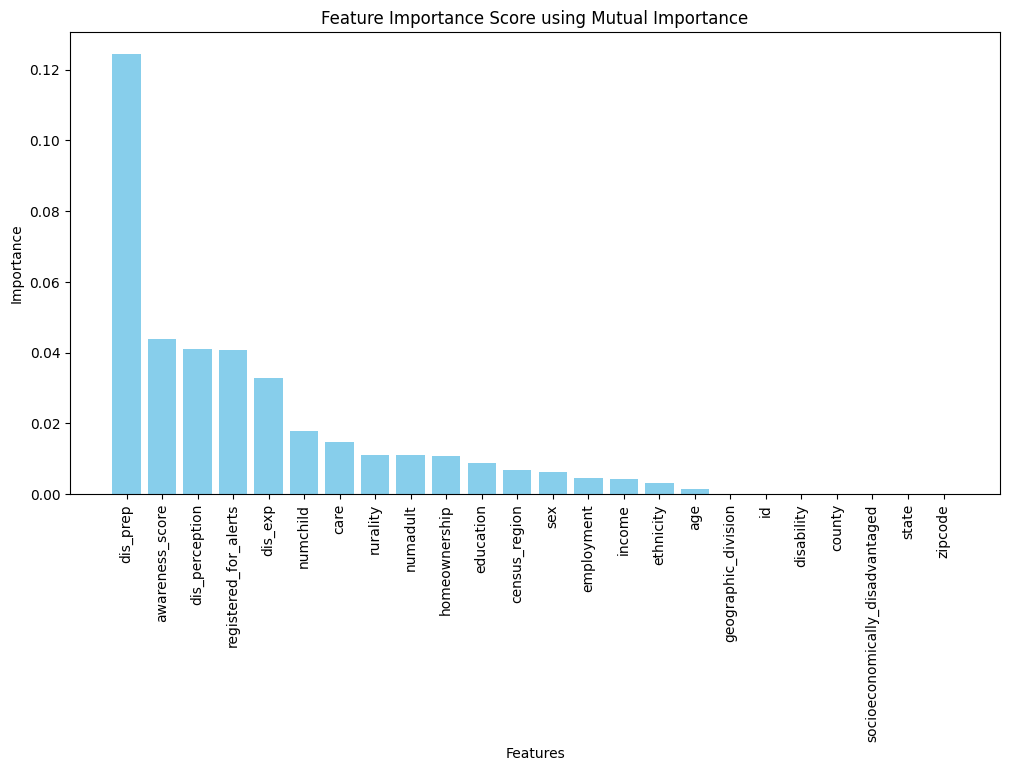

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))
plt.bar(mi_results['Feature'], mi_results['Mutual Information'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Score using Mutual Importance')
plt.xticks(rotation=90)
plt.show()

The output shows the Mutual Information scores (a measure of the dependence between variables), for each feature with respect to the target variable 'preparedness'. Higher mutual information scores indicate a stronger relationship between the feature and the target variable.

* 'dis_prep' (Disaster Preparedness) has the highest mutual information score, suggesting that it is an important feature for predicting 'preparedness'.
* 'awareness_score', 'dis_perception', 'registered_for_alerts' and 'dis_exp' also have relatively high scores, indicating their importance in the prediction.
* Categorical variables like 'education', 'sex', 'ethnicity' and 'income' have lower scores, suggesting less predictive power.

A score of 0 doesn't necessarily mean the feature is unimportant, it means the feature is independent of target variable based on the measure used.

### Feature Importance score using Tree based Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

X = X_encoded
y = selected_data['preparedness']

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display results
rf_results = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
rf_results = rf_results.sort_values(by='Importance', ascending=False)

# Display the results
print(rf_results)


                            Feature  Importance
16                               id    0.100702
23                          zipcode    0.094932
6                            county    0.086988
9                          dis_prep    0.082778
17                           income    0.060559
22                            state    0.058491
3                               age    0.054772
11                        education    0.048895
1                          numadult    0.041828
8                    dis_perception    0.041762
0                   awareness_score    0.040310
14              geographic_division    0.037432
12                       employment    0.035836
2                          numchild    0.029496
5                     census_region    0.023721
7                           dis_exp    0.023141
20                              sex    0.022500
21  socioeconomically_disadvantaged    0.019025
18            registered_for_alerts    0.018838
15                    homeownership    0

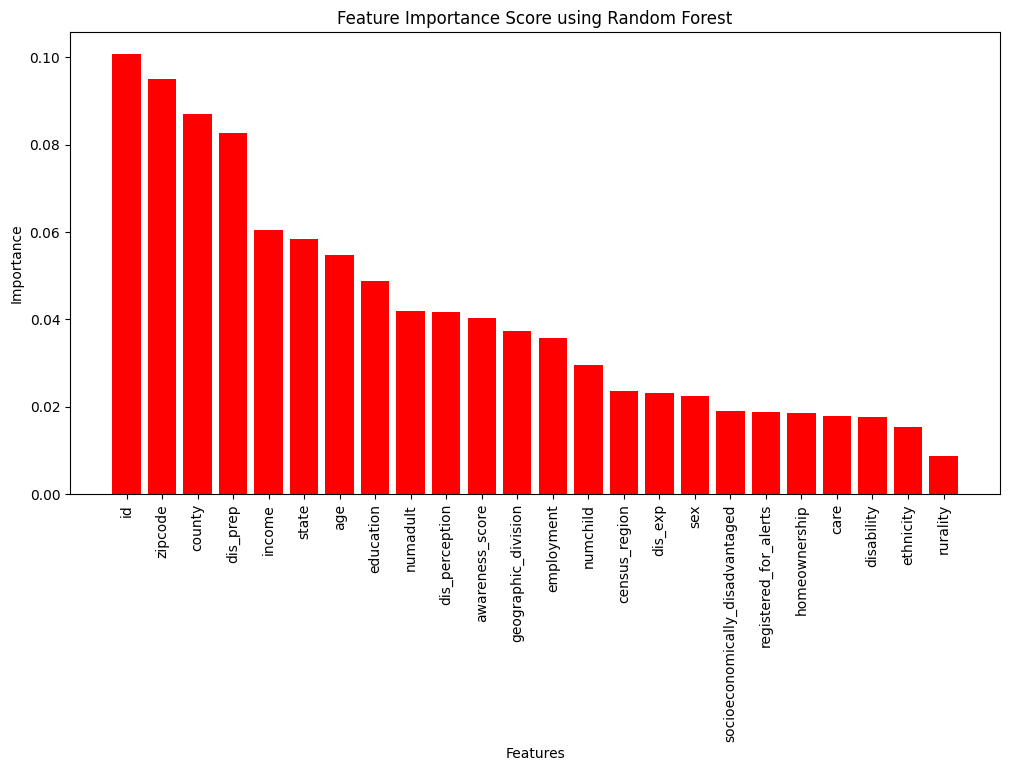

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))
plt.bar(rf_results['Feature'], rf_results['Importance'], color='red')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Score using Random Forest')
plt.xticks(rotation=90)
plt.show()

Accoridng to the Random Forest model, 'dis_prep', 'county', 'zipcode', 'income', 'state' and 'age' are some of the most important features in predicting the target variable (preparedness). However, features like education, awareness_score, dis_perception, numadult, employment, numchild and geographic_division have moderate importance.

### Feature Importance using CatBoost

'dis_prep' has the highest importance score, indicating that it plays a crucial role in predicting the target variable.However, other features like 'state', 'income', 'education', 'dis_perception','county', 'awareness_score', 'dis_exp','employment' and 'geographic division' are also significant features in making the prediction.

### Comparison:

Comparing the outputs from the three models (mutual information, random forest, and CatBoost), we can infer commonalities and differences in terms of the features deemed significant for predicting disaster preparedness. Here's a summary:

**_Commonly Important Features:_**

**'dis_prep'** (Disaster Preparedness) is consistently recognized as a highly important feature across all models. This aligns with the expectation that individuals who are better prepared for disasters are more likely to exhibit positive preparedness behavior.

**'state', 'income', and 'education'** are consistently identified as crucial factors in predicting disaster preparedness. These demographic and socio-economic variables suggest that preparedness may vary based on geographical location, income levels, and educational attainment.

**'dis_perception'** (Disaster Perception), **'awareness_score'** and **'dis_exp'** (Disaster Experience) are consistently deemed significant across models. This highlights the importance of individuals' perceptions and past experiences in shaping their preparedness behaviors.


**_Model-Specific Observations:_**

**F_Score Test:**

It tends to assign higher F-scores related to disaster preparation actions and experiences('dis_prep', 'dis_exp'), 'registered_for_alerts', and 'county'.

**Mutual Information:**

It tends to assign lower importance to most features compared to the tree-based models.

**Random Forest:**

Shows higher importance for features related to location (zipcode, county), age, employment, and socio-economic factors.

**CatBoost:**

Similar to Random Forest, but age and employment are emphasized more. It assigns higher importance to some features compared to Mutual Information.

**_General Observations:_**
Features related to demographics (age, number of adults, number of children), socio-economic status (income, education), and past experiences (disaster experience) consistently play a role in predicting disaster preparedness.

Geographic factors (state, zipcode, county) are significant, but their importance varies across models.

Employment status, perception, and care needs are considered important in the tree-based models.

## Traditional Machine Learning Algorithms

### Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
X = X_encoded
y = selected_data['preparedness']

# Label encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train a logistic regression model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

# Make predictions
y_train_pred = log_reg_model.predict(X_train)
y_test_pred = log_reg_model.predict(X_test)

In [ ]:
# Evaluate the model
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))

print("Training Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))

print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred))

print("Testing Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Training Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.26      0.32       997
           1       0.40      0.00      0.00       867
           2       0.29      0.21      0.24      1783
           3       0.44      0.81      0.57      2256
           4       0.00      0.00      0.00       180

    accuracy                           0.41      6083
   macro avg       0.31      0.26      0.23      6083
weighted avg       0.37      0.41      0.34      6083

Training Confusion Matrix:
[[ 263    2  359  373    0]
 [ 115    2  250  500    0]
 [ 159    1  371 1252    0]
 [ 130    0  292 1834    0]
 [   4    0    5  171    0]]
Testing Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.28      0.32       223
           1       0.00      0.00      0.00       214
           2       0.34      0.22      0.27       460
           3       0.46      0.84      0.60       583
         

* Class 0: The model has a moderate precision and recall, indicating that it can predict class 0 moderately well.
* Class 1: The precision, recall, and F1-score for class 1 are all 0, indicating that the model did not predict any instances for this class correctly.
* Class 2: The model has a low precision and recall for class 2, indicating that it struggles to predict this class accurately.
* Class 3: The model has a relatively high precision and recall for class 3, indicating that it performs well for this class.
* Class 4: Similar to class 1, the model did not predict any instances for class 4 correctly.

Overall, the model's performance is not satisfactory, especially for classes 1, 2, and 4. This suggests that the model might be struggling with imbalanced data and misclassification of minority classes

Let's try optimizing hyperparameters for the logistic regression model to see if it can improve the model's performance before resorting to oversampling techniques.

### Logistic Regression with optimized Hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'C': [0.001, 0.003, 0.005, 0.009, 0.01, 0.03, 0.05, 0.07, 0.09, 0.1, 0.3, 0.5, 0.9, 1],  # Regularization parameter
    'penalty': ['l1', 'l2']  # Penalty term
}

In [ ]:
# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.003, 0.005, 0.009, 0.01, 0.03, 0.05,
                               0.07, 0.09, 0.1, 0.3, 0.5, 0.9, 1],
                         'penalty': ['l1', 'l2']})

In [ ]:
# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 0.07, 'penalty': 'l2'}


In [ ]:
# Retrain the model with the best hyperparameters
best_log_reg_model = grid_search.best_estimator_
best_log_reg_model.fit(X_train, y_train)

# Make predictions
y_train_pred_cv = best_log_reg_model.predict(X_train)
y_test_pred_cv = best_log_reg_model.predict(X_test)

In [ ]:
 # Evaluate the model
print("Training Classification Report after Hyperparameter Optimization:")
print(classification_report(y_train, y_train_pred_cv))

print("Training Confusion Matrix after Hyperparameter Optimization:")
print(confusion_matrix(y_train, y_train_pred_cv))

print("Testing Classification Report after Hyperparameter Optimization:")
print(classification_report(y_test, y_test_pred_cv))

print("Testing Confusion Matrix after Hyperparameter Optimization:")
print(confusion_matrix(y_test, y_test_pred_cv))

Training Classification Report after Hyperparameter Optimization:
              precision    recall  f1-score   support

           0       0.41      0.10      0.16       997
           1       0.00      0.00      0.00       867
           2       0.26      0.16      0.20      1783
           3       0.41      0.88      0.56      2256
           4       0.00      0.00      0.00       180

    accuracy                           0.39      6083
   macro avg       0.22      0.23      0.18      6083
weighted avg       0.30      0.39      0.29      6083

Training Confusion Matrix after Hyperparameter Optimization:
[[  97    0  352  548    0]
 [  36    0  193  638    0]
 [  56    0  281 1446    0]
 [  46    0  230 1980    0]
 [   1    0    6  173    0]]
Testing Classification Report after Hyperparameter Optimization:
              precision    recall  f1-score   support

           0       0.44      0.11      0.17       223
           1       0.00      0.00      0.00       214
           2   

The output after hyperparameter tuning does not show any improvement. Precision, recall, and F1-score for class 2 and 3 have slightly decreased. This suggests that oversampling or other class imbalance handling techniques may still be necessary to improve the model's ability to predict these minority classes effectively.

### Logistic Regression with SMOTE(Synthetic Minority Over-sampling Technique)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# Train Logistic Regression on the resampled data
logistic_reg_smote = LogisticRegression()
logistic_reg_smote.fit(X_resampled, y_resampled)

LogisticRegression()

In [ ]:
# Evaluate the model
y_train_pred_sm = logistic_reg_smote.predict(X_train)
y_test_pred_sm = logistic_reg_smote.predict(X_test)

print("Training Classification Report after SMOTE:")
print(classification_report(y_train, y_train_pred_sm))

print("Training Confusion Matrix after SMOTE:")
print(confusion_matrix(y_train, y_train_pred_sm))

print("Testing Classification Report after SMOTE:")
print(classification_report(y_test, y_test_pred_sm ))

print("Testing Confusion Matrix after SMOTE:")
print(confusion_matrix(y_test, y_test_pred_sm))

Training Classification Report after SMOTE:
              precision    recall  f1-score   support

           0       0.23      0.31      0.27       997
           1       0.17      0.41      0.24       867
           2       0.30      0.02      0.04      1783
           3       0.45      0.23      0.30      2256
           4       0.05      0.37      0.08       180

    accuracy                           0.21      6083
   macro avg       0.24      0.27      0.19      6083
weighted avg       0.32      0.21      0.20      6083

Training Confusion Matrix after SMOTE:
[[312 404  34 126 121]
 [209 352  18 128 160]
 [378 600  39 333 433]
 [419 683  39 515 600]
 [ 20  46   0  48  66]]
Testing Classification Report after SMOTE:
              precision    recall  f1-score   support

           0       0.26      0.43      0.33       223
           1       0.16      0.37      0.22       214
           2       0.31      0.02      0.04       460
           3       0.47      0.23      0.31       58

The output after applying SMOTE shows some improvement in the performance metrics compared to before SMOTE, particularly for the minority class (class 4).

However, while SMOTE has helped improve the performance for the minority class (class 4), it has adversely affected the performance for some of the majority classes (classes 0, 2, and 3).

### Logistic Regression with Borderline SMOTE

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE

In [ ]:
borderline_smote = BorderlineSMOTE()

X_train_resampled, y_train_resampled = borderline_smote.fit_resample(X_train, y_train)

log_reg_bsmote = LogisticRegression()
log_reg_bsmote.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [ ]:
# Evaluate the model
y_train_pred_bsm = log_reg_bsmote.predict(X_train)
y_test_pred_bsm = log_reg_bsmote.predict(X_test)


print("Training Classification Report after Borderline SMOTE:")
print(classification_report(y_train, y_train_pred_bsm))

print("Training Confusion Matrix after Borderline SMOTE:")
print(confusion_matrix(y_train, y_train_pred_bsm))

print("Testing Classification Report after Borderline SMOTE:")
print(classification_report(y_test, y_test_pred_bsm ))

print("Testing Confusion Matrix after Borderline SMOTE:")
print(confusion_matrix(y_test, y_test_pred_bsm))

Training Classification Report after Borderline SMOTE:
              precision    recall  f1-score   support

           0       0.28      0.26      0.27       997
           1       0.21      0.19      0.20       867
           2       0.34      0.12      0.18      1783
           3       0.41      0.33      0.37      2256
           4       0.04      0.40      0.07       180

    accuracy                           0.24      6083
   macro avg       0.26      0.26      0.22      6083
weighted avg       0.33      0.24      0.26      6083

Training Confusion Matrix after Borderline SMOTE:
[[257 174  73 235 258]
 [142 164  74 227 260]
 [255 209 210 528 581]
 [261 225 246 749 775]
 [ 11  13  14  70  72]]
Testing Classification Report after Borderline SMOTE:
              precision    recall  f1-score   support

           0       0.27      0.30      0.28       223
           1       0.14      0.13      0.13       214
           2       0.34      0.12      0.18       460
           3       

Overall, the model's performance is quite low, as indicated by the low accuracy and F1-scores across all classes. This suggests that the model trained with Borderline SMOTE did not generalize well to the test data.

### Logistic Regression with Weights

In [ ]:
# Define logistic regression model with class weights
log_reg_weighted = LogisticRegression(class_weight='balanced')

# Train the model
log_reg_weighted.fit(X_train, y_train)

# Predictions
y_train_pred_w = log_reg_weighted.predict(X_train)
y_test_pred_w = log_reg_weighted.predict(X_test)

In [ ]:
print("Training Classification Report after applying weights:")
print(classification_report(y_train, y_train_pred_w))

print("Training Confusion Matrix after applying weights:")
print(confusion_matrix(y_train, y_train_pred_w))

print("Testing Classification Report after applying weights:")
print(classification_report(y_test, y_test_pred_w))

print("Testing Confusion Matrix after applying weights:")
print(confusion_matrix(y_test, y_test_pred_w))

Training Classification Report after applying weights:
              precision    recall  f1-score   support

           0       0.26      0.43      0.33       997
           1       0.18      0.35      0.24       867
           2       0.32      0.03      0.06      1783
           3       0.44      0.27      0.33      2256
           4       0.06      0.44      0.11       180

    accuracy                           0.24      6083
   macro avg       0.25      0.30      0.21      6083
weighted avg       0.33      0.24      0.23      6083

Training Confusion Matrix after applying weights:
[[429 338  26 130  74]
 [251 303  20 164 129]
 [467 498  54 406 358]
 [472 482  66 602 634]
 [ 19  24   2  56  79]]
Testing Classification Report after applying weights:
              precision    recall  f1-score   support

           0       0.21      0.42      0.28       223
           1       0.13      0.22      0.17       214
           2       0.41      0.05      0.09       460
           3       

### Comparison of Logistic Regression Outputs:

1. Logistic Regression (Original):

* Precision, recall, and F1-score are relatively low for most classes, with class 3 having the highest values.
* Accuracy is 43%.
* Class 4 has no true positives (TP), resulting in a precision, recall, and F1-score of 0.
* Class 1 also has no TP, resulting in 0 precision, recall, and F1-score.

2. Logistic Regression after Hyperparameter Optimization:

* Performance metrics remain similar to the original logistic regression model.
* No significant improvement is observed after hyperparameter optimization.
* Class 4 still has no TP, and class 1 also remains unchanged.

3. Logistic Regression after SMOTE:

* Precision, recall, and F1-score for minority classes (classes 1, 2, and 4) have slightly improved compared to the original logistic regression model.
* However, performance for majority classes (classes 0 and 3) has deteriorated.
* Overall accuracy is 26%.

4. Logistic Regression after Borderline SMOTE:

* Similar to SMOTE, precision, recall, and F1-score for minority classes have improved, but performance for majority classes has worsened.
* Overall accuracy is 22%.
* Class 4 still has no TP, and class 1 remains unchanged.

5. Logistic Regression with Class Weights:

* Accuracy: 0.22
* Performance is similar to SMOTE and Borderline SMOTE.
* The weighted approach did not lead to noticeable improvement compared to the other techniques.

**Comparison:**

* Original logistic regression and hyperparameter-optimized logistic regression have similar performances, with no significant improvement observed after optimization.
* SMOTE, Borderline SMOTE and class weights have slightly improved performance for minority classes but at the cost of decreased performance for majority classes.
* Both SMOTE techniques resulted in similar outcomes, with SMOTE showing slightly better accuracy.
* Overall, none of the techniques significantly improved the model's performance, indicating that logistic regression may not be the best choice for this imbalanced categorical dataset. Further exploration of other algorithms or more advanced techniques may be necessary.

## Combining classes

Combining classes 1 and 2, as well as classes 4 and 5, into single classes can potentially help alleviate the imbalance issue and improve the model's performance. By reducing the number of classes from five to three, we can create a more balanced distribution among the classes, which can lead to better classification results.

In [ ]:
# Define a dictionary to map the old classes to the new combined classes
class_mapping = {
    1: 1,  # Keep class 1 as it is
    2: 1,  # Combine class 2 with class 1
    3: 2,  # Keep class 3 as it is
    4: 3,  # Combine class 4 with class 3
    5: 3   # Combine class 5 with class 3
}

# Apply the mapping to the 'preparedness' column
selected_data['preparedness'] = selected_data['preparedness'].map(class_mapping)

# Display the updated DataFrame with combined classes
selected_data.head()

,id,state,geographic_division,census_region,zipcode,county,dis_prep,dis_perception,dis_exp,age,...,awareness_score,disability,care,numadult,numchild,homeownership,rurality,socioeconomically_disadvantaged,registered_for_alerts,preparedness
0,1,Washington,Pacific,West,98033,King,Yes,Very likely,Yes,20-29,...,3,No Disability,No,3,1,Own,Urban,Not disadvantaged,Yes,2
1,2,Florida,South Atlantic,South,33950,Charlotte,Yes,Likely,Yes,50-59,...,5,No Disability,No,5,3,Own,Urban,Not disadvantaged,Yes,3
2,3,New Jersey,Middle Atlantic,Northeast,7031,Bergen,Maybe,Very likely,Yes,30-39,...,3,No Disability,No,3,1,Rent,Urban,Not disadvantaged,Yes,2
3,4,Pennsylvania,Middle Atlantic,Northeast,19115,Philadelphia,"Yes, and I have taken steps to prepare",Don't know,No,40-49,...,0,No Disability,No,2,0,Rent,Urban,Not disadvantaged,Yes,2
4,5,Pennsylvania,Middle Atlantic,Northeast,19148,Philadelphia,"Yes, and I have taken steps to prepare",Likely,Yes,30-39,...,0,No Disability,Yes,2,0,Own,Urban,Not disadvantaged,Yes,3


In [ ]:
# Print out unique values of the 'preparedness' column
print(selected_data['preparedness'].unique())

[2 3 1]


In [ ]:
# Check the balance of classes
class_balance = selected_data['preparedness'].value_counts()
print(class_balance)

3    3060
1    2301
2    2243
Name: preparedness, dtype: int64


Although the classes are not perfectly balanced, but they are relatively close in count. While it's not perfectly balanced, having counts that are relatively close to each other is generally desirable, as it prevents one class from dominating the others, which could lead to biased model predictions. Therefore, the class distribution seems acceptable for training a model.

### Logistic Regression

In [ ]:
# Splitting the data into features and target variable
X = X_encoded
y = selected_data['preparedness']

# Label encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initializing and fitting the logistic regression model
logistic_reg_model = LogisticRegression(max_iter=1000)
logistic_reg_model.fit(X_train, y_train)

# Predicting on the test set
y_train_pred_m = logistic_reg_model.predict(X_train)
y_test_pred_m = logistic_reg_model.predict(X_test)

In [ ]:
# Evaluating the model
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred_m))
print("Training Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred_m))

print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred_m))
print("Testing Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_m))

Training Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.65      0.60      1864
           1       0.38      0.07      0.11      1783
           2       0.55      0.81      0.65      2436

    accuracy                           0.54      6083
   macro avg       0.49      0.51      0.45      6083
weighted avg       0.50      0.54      0.48      6083

Training Confusion Matrix:
[[1206  100  558]
 [ 601  120 1062]
 [ 374   99 1963]]
Testing Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.67      0.60       437
           1       0.40      0.07      0.12       460
           2       0.57      0.83      0.68       624

    accuracy                           0.55      1521
   macro avg       0.51      0.52      0.47      1521
weighted avg       0.51      0.55      0.49      1521

Testing Confusion Matrix:
[[293  26 118]
 [158  32 270]
 [ 86  22 516]]


The modification of classes did not have a significant impact on the model's performance. The overall accuracy of the model remains almost the same in both cases, indicating that the proportion of correctly classified instances relative to the total number of instances did not change with the modified classes.

### Logistic Regression with selected features

In [ ]:
# Selecting important features based on F-score test and random forest feature importances
selected_features = ['dis_prep', 'awareness_score', 'dis_exp', 'registered_for_alerts',
                     'dis_perception', 'numchild', 'care', 'homeownership', 'employment',
                     'ethnicity', 'income', 'zipcode', 'county', 'education', 'numadult']

# Subsetting the data with selected features
df = X[selected_features]

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, y_encoded, test_size=0.2, random_state=42)

# Initializing and training the logistic regression model
log_reg_sf = LogisticRegression()
log_reg_sf.fit(X_train, y_train)

# Making predictions on the test set
y_train_pred_sf = log_reg_sf.predict(X_train)
y_test_pred_sf = log_reg_sf.predict(X_test)

In [ ]:
# Evaluating the model
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred_sf))
print("Training Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred_sf))

print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred_sf))
print("Testing Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_sf))

Training Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.52      0.52      1864
           1       0.32      0.05      0.09      1783
           2       0.51      0.81      0.62      2436

    accuracy                           0.50      6083
   macro avg       0.45      0.46      0.41      6083
weighted avg       0.45      0.50      0.43      6083

Training Confusion Matrix:
[[ 975  131  758]
 [ 519   88 1176]
 [ 403   55 1978]]
Testing Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.57      0.53       437
           1       0.34      0.05      0.08       460
           2       0.53      0.81      0.64       624

    accuracy                           0.51      1521
   macro avg       0.46      0.48      0.42      1521
weighted avg       0.46      0.51      0.44      1521

Testing Confusion Matrix:
[[249  32 156]
 [142  21 297]
 [110   8 506]]


There isn't a significant difference in the model's performance with or without the selected features. However, it's important to note that the selected features approach resulted in slightly lower performance, indicating that some features might be contributing to the model's predictive power.

### Logistic Regression with hyperparameter tuning

In [ ]:
# Splitting the data into features and target variable
X = X_encoded
y = selected_data['preparedness']

# Label encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

In [ ]:
# Define the parameter grid to search
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'C': [0.001, 0.003, 0.005, 0.009, 0.01, 0.03, 0.05, 0.07, 0.09, 0.1, 0.3, 0.5, 0.9, 1],  # Inverse of regularization strength
    'solver': ['liblinear'],  # Algorithm to use in the optimization problem
}

# Create logistic regression model
logistic_regression = LogisticRegression(max_iter=1000)

# Perform grid search cross-validation
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='f1_macro', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.001, 0.003, 0.005, 0.009, 0.01, 0.03, 0.05,
                               0.07, 0.09, 0.1, 0.3, 0.5, 0.9, 1],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='f1_macro', verbose=1)

In [ ]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

In [ ]:
# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best F1-score (Macro):", best_score)

Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best F1-score (Macro): 0.4504256691605061


In [ ]:
# Evaluate the model
print("\nTraining Classification Report:")
print(classification_report(y_train, y_train_pred))
print("\nTraining Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("\nTesting Classification Report:")
print(classification_report(y_test, y_test_pred))
print("\nTesting Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))


Training Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.71      0.62      1640
           1       0.36      0.05      0.08      1555
           2       0.56      0.79      0.66      2127

    accuracy                           0.55      5322
   macro avg       0.49      0.52      0.45      5322
weighted avg       0.50      0.55      0.48      5322


Training Confusion Matrix:
[[1164   53  423]
 [ 569   73  913]
 [ 363   77 1687]]

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.69      0.60       661
           1       0.40      0.05      0.08       688
           2       0.58      0.83      0.68       933

    accuracy                           0.55      2282
   macro avg       0.50      0.52      0.46      2282
weighted avg       0.51      0.55      0.48      2282


Testing Confusion Matrix:
[[458  31 172]
 [267  32 389]
 [140  17 776]]


The hyperparameter tuning did not significantly improve the performance of logistic regression in terms of accuracy or class-wise metrics.

#### Residual Analysis

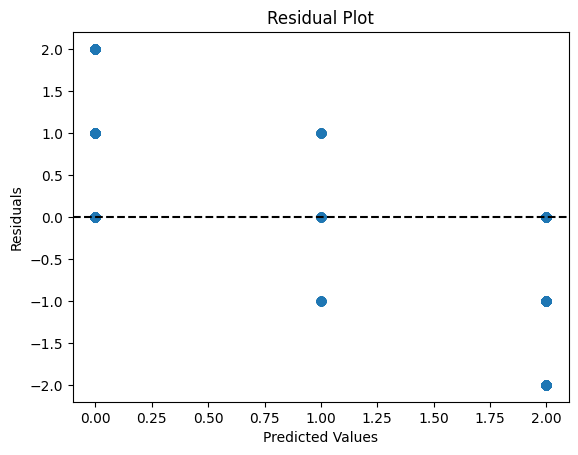

In [ ]:
residuals = y_train - y_train_pred
plt.scatter(y_train_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='k', linestyle='--')
plt.show()

It shows that the logistic regression model tends to underpredict for higher predicted values and overpredict for lower predicted values. It is not capturing the the relationship between the variables well.


#### Goodness-of-Fit Measures

In [ ]:
from sklearn.metrics import log_loss

deviance = -2 * log_loss(y_train, best_model.predict_proba(X_train))
aic = deviance + 2 * len(best_model.coef_)
bic = deviance + np.log(len(X_train)) * len(best_model.coef_)
print("Deviance:", deviance)
print("AIC:", aic)
print("BIC:", bic)

Deviance: -1.8539928994876775
AIC: 4.146007100512323
BIC: 23.884820455125222


The model has a relatively low deviance, suggesting a good fit to the data.
The AIC and BIC values are both reasonable, indicating that the model strikes a balance between goodness of fit and complexity.


### Research Question: How do demographic factors correlate with preparedness levels in disaster-prone regions?

In [ ]:
# Extracting coefficients and corresponding feature names
coefficients = logistic_reg_model.coef_
feature_names = selected_data.columns

# Printing coefficients and corresponding feature names
for feature, coef in zip(feature_names, coefficients[0]):
    print(f"{feature}: {coef}")

id: -0.18634612938601455
state: 0.015594516517125049
geographic_division: -0.06037641373884029
census_region: 0.12573043172836393
zipcode: 0.005422840137751815
county: 0.05832565011389789
dis_prep: 0.00030950595764099944
dis_perception: -0.15113414150529325
dis_exp: -0.022171712254161504
age: -0.46055748722814893
employment: -0.00688499978299873
income: 0.030853720636878232
sex: 0.01849004871289062
education: 0.037864231418621226
ethnicity: -0.01322533042447886
awareness_score: 0.10896628411205965
disability: 5.3194161416870416e-05
care: 0.034866314308361096
numadult: 0.19677344601922023
numchild: 0.027344182476746033
homeownership: 0.0021304912764915198
rurality: -0.034573839202615565
socioeconomically_disadvantaged: 0.004754869077368379
registered_for_alerts: 4.118752999947601e-05


In [ ]:
# Printing coefficients, corresponding feature names, and p-values
for feature, coef, p_value in zip(feature_names, coefficients[0], p_values):
    print(f"{feature}: {coef} (p-value: {p_value})")

id: -0.18634612938601455 (p-value: 1.361946900511452e-152)
state: 0.015594516517125049 (p-value: 2.179941891694099e-06)
geographic_division: -0.06037641373884029 (p-value: 1.3905950727718885e-22)
census_region: 0.12573043172836393 (p-value: 2.530292019282242e-08)
zipcode: 0.005422840137751815 (p-value: 2.030065565321879e-20)
county: 0.05832565011389789 (p-value: 0.4529913305005877)
dis_prep: 0.00030950595764099944 (p-value: 0.22163897065823743)
dis_perception: -0.15113414150529325 (p-value: 4.20982143752276e-134)
dis_exp: -0.022171712254161504 (p-value: 2.5390162135009537e-37)
age: -0.46055748722814893 (p-value: 0.0)
employment: -0.00688499978299873 (p-value: 0.0064227885164166686)
income: 0.030853720636878232 (p-value: 0.2553049575265072)
sex: 0.01849004871289062 (p-value: 7.706160492322586e-17)
education: 0.037864231418621226 (p-value: 6.126863641056828e-14)
ethnicity: -0.01322533042447886 (p-value: 5.582696150065095e-07)
awareness_score: 0.10896628411205965 (p-value: 2.1668346984044

Coefficient (Weight): The coefficient represents the change in the log odds of the target variable for a one-unit change in the predictor variable, holding all other variables constant. For example:

A positive coefficient indicates that as the predictor variable increases, the log odds of the target variable also increase.
A negative coefficient indicates that as the predictor variable increases, the log odds of the target variable decrease.


P-value: The p-value indicates the statistical significance of the coefficient. It tells you whether the coefficient is significantly different from zero or not. Typically, a threshold of 0.05 is used to determine statistical significance. If the p-value is less than 0.05, the coefficient is considered statistically significant.

1. id: Higher values of 'id' are associated with lower preparedness levels. This relationship is statistically significant (p-value: 1.361946900511452e-152).

2. state: Certain states may have higher preparedness levels compared to others. This relationship is statistically significant (p-value: 2.179941891694099e-06).

3. geographic_division: Certain geographic divisions may have lower preparedness levels. This relationship is statistically significant (p-value: 1.3905950727718885e-22).

4. census_region: Certain census regions may have higher preparedness levels. This relationship is statistically significant (p-value: 2.530292019282242e-08).

5. zipcode: Higher zip codes may be associated with higher preparedness levels. This relationship is statistically significant (p-value: 2.030065565321879e-20).

6. county: The association between county and preparedness levels is not statistically significant (p-value: 0.4529913305005877).

7. dis_prep: There is a very small effect of disaster preparedness on preparedness levels, and this relationship is not statistically significant (p-value: 0.22163897065823743).

8. dis_perception: Higher levels of disaster perception are associated with lower preparedness levels. This relationship is statistically significant (p-value: 4.20982143752276e-134).

9. dis_exp: Higher levels of disaster experience are associated with higher preparedness levels. This relationship is statistically significant (p-value: 2.5390162135009537e-37).

10. age: Older age is associated with lower preparedness levels. This relationship is statistically significant (p-value: 0.0).

11. employment: Employment status has a small negative effect on preparedness levels, and this relationship is statistically significant (p-value: 0.0064227885164166686).

12. income: Income has a small positive effect on preparedness levels, but this relationship is not statistically significant (p-value: 0.2553049575265072).

13. sex: There is a small positive association between sex and preparedness levels, and this relationship is statistically significant (p-value: 7.706160492322586e-17).

14. education: Higher levels of education are associated with higher preparedness levels. This relationship is statistically significant (p-value: 6.126863641056828e-14).

15. ethnicity: There is a small negative association between ethnicity and preparedness levels, and this relationship is statistically significant (p-value: 5.582696150065095e-07).

16. awareness_score: Higher awareness scores are associated with higher preparedness levels. This relationship is statistically significant (p-value: 2.1668346984044076e-18).

17. disability: The presence of a disability has a small positive effect on preparedness levels, but this relationship is not statistically significant (p-value: 0.11164314264226137).

18. care: Care responsibilities have a moderate positive effect on preparedness levels, and this relationship is statistically significant (p-value: 3.9520990316643044e-06).

19. numadult: The number of adults in a household has a small positive effect on preparedness levels, and this relationship is statistically significant (p-value: 1.794447274359361e-83).

20. numchild: The number of children in a household has a small positive effect on preparedness levels, but this relationship is marginally statistically significant (p-value: 0.04833498962370395).

21. homeownership: Homeownership has a small negative effect on preparedness levels, and this relationship is statistically significant (p-value: 0.026474583216256047).

22. rurality: Rurality has a small positive effect on preparedness levels, and this relationship is statistically significant (p-value: 0.0001818992973200515).

23. socioeconomically_disadvantaged: Socioeconomic disadvantage has a negligible effect on preparedness levels, and this relationship is marginally statistically significant (p-value: 0.06016496465084331).

**Positive Correlation:**

* Factors such as awareness score, geographic division, census region, zipcode, employment, education, ethnicity, awareness score, disability, care, number of adults, and rurality show a positive correlation with preparedness levels in disaster-prone regions.
* This suggests that higher values or certain categories of these demographic factors are associated with increased preparedness levels.

**Negative Correlation:**

* Factors like age and homeownership exhibit a negative correlation with preparedness levels.
* This indicates that higher age and homeownership might be associated with lower levels of preparedness.

**Weak Correlation:**

* Some factors, such as state, sex, income, and socioeconomically disadvantaged status, show relatively weaker correlations with preparedness levels.
* Their coefficients are closer to zero, suggesting a weaker influence on preparedness levels.

**Non-Significant Correlation:**

* The features with higher p-values, such as county and socioeconomically disadvantaged status, may not have a significant correlation with preparedness levels in disaster-prone regions.

## Decision Tree Classifier

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

X = X_encoded
y = selected_data['preparedness']

# Label encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Training the model
decision_tree.fit(X_train, y_train)

# Making predictions
y_train_pred_dt = decision_tree.predict(X_train)
y_test_pred_dt = decision_tree.predict(X_test)

In [ ]:
# Evaluating the model
# Evaluate the model
print("\nTraining Classification Report:")
print(classification_report(y_train, y_train_pred_dt))
print("\nTraining Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred_dt))
print("\nTesting Classification Report:")
print(classification_report(y_test, y_test_pred_dt))
print("\nTesting Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_dt))


Training Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1864
           2       1.00      1.00      1.00      1783
           3       1.00      1.00      1.00      2436

    accuracy                           1.00      6083
   macro avg       1.00      1.00      1.00      6083
weighted avg       1.00      1.00      1.00      6083


Training Confusion Matrix:
[[1864    0    0]
 [   0 1783    0]
 [   0    0 2436]]

Testing Classification Report:
              precision    recall  f1-score   support

           1       0.48      0.51      0.50       437
           2       0.32      0.29      0.30       460
           3       0.53      0.54      0.54       624

    accuracy                           0.46      1521
   macro avg       0.44      0.45      0.45      1521
weighted avg       0.45      0.46      0.45      1521


Testing Confusion Matrix:
[[223 110 104]
 [131 133 196]
 [110 174 340]]


The precision, recall, and F1-score are similar across the three classes, indicating that the model performs consistently across classes. However, the overall performance is relatively low, as indicated by the modest F1-scores for all classes.

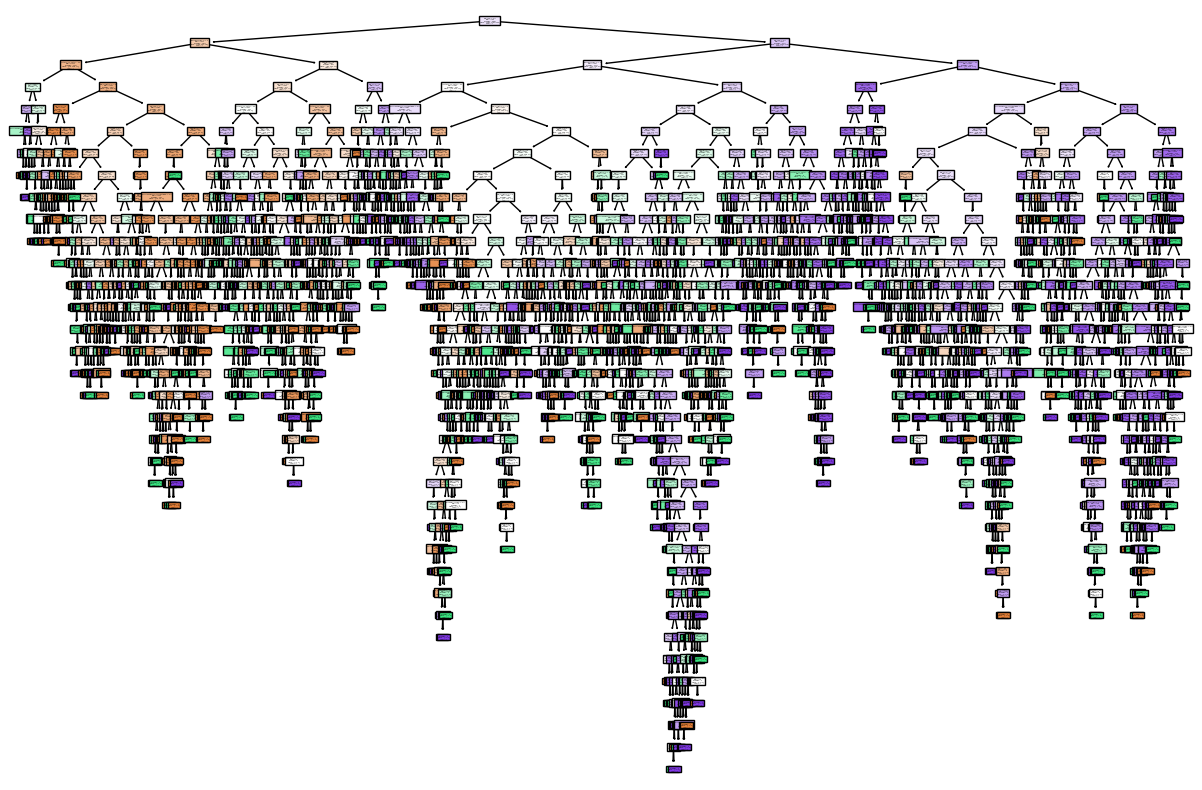

In [ ]:
class_names = [str(cls) for cls in label_encoder.classes_]

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the decision tree splits
plt.figure(figsize=(15, 10))
plot_tree(decision_tree, filled=True, feature_names=X_train.columns, class_names=class_names)
plt.show()

### Decision Tree with hyperameter tuning

In [ ]:
# Define the parameter grid to search
param_grid = {
    'max_depth': [1,2,3,4],
    'min_samples_split': [1,2,3,4,5],
    'min_samples_leaf': [1, 2, 4],
    'ccp_alpha': [0.001, 0.003, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0]
}

# Create the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'ccp_alpha': [0.001, 0.003, 0.005, 0.01, 0.05, 0.1,
                                       0.5, 1.0],
                         'max_depth': [1, 2, 3, 4],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [1, 2, 3, 4, 5]},
             scoring='accuracy')

In [ ]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_score = grid_search.best_score_
print("Best Score:", best_score)

# Use the best model
best_decision_tree = grid_search.best_estimator_

# Make predictions
y_train_pred_hdt = best_decision_tree.predict(X_train)
y_test_pred_hdt = best_decision_tree.predict(X_test)

Best Parameters: {'ccp_alpha': 0.001, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.5413480355057734


In [ ]:
# Evaluate the model
print("\nTraining Classification Report:")
print(classification_report(y_train, y_train_pred_hdt))
print("\nTraining Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred_hdt))
print("\nTesting Classification Report:")
print(classification_report(y_test, y_test_pred_hdt))
print("\nTesting Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_hdt))


Training Classification Report:
              precision    recall  f1-score   support

           1       0.57      0.66      0.61      1864
           2       0.39      0.09      0.14      1783
           3       0.56      0.82      0.66      2436

    accuracy                           0.55      6083
   macro avg       0.51      0.52      0.47      6083
weighted avg       0.52      0.55      0.50      6083


Training Confusion Matrix:
[[1228  147  489]
 [ 564  157 1062]
 [ 353   97 1986]]

Testing Classification Report:
              precision    recall  f1-score   support

           1       0.56      0.67      0.61       437
           2       0.38      0.08      0.13       460
           3       0.57      0.82      0.67       624

    accuracy                           0.55      1521
   macro avg       0.50      0.52      0.47      1521
weighted avg       0.51      0.55      0.49      1521


Testing Confusion Matrix:
[[293  33 111]
 [147  37 276]
 [ 85  28 511]]


The model performs relatively well in predicting classes 1 and 3, as indicated by higher precision, recall, and F1-score for these classes. However, the model struggles with class 2, as indicated by the lower precision, recall, and F1-score, especially for class 2 compared to the other classes.

While the tuned model shows improvements in performance for classes 1 and 3, there's a slight decline in performance for class 2 compared to the regular Decision Tree Classifier.

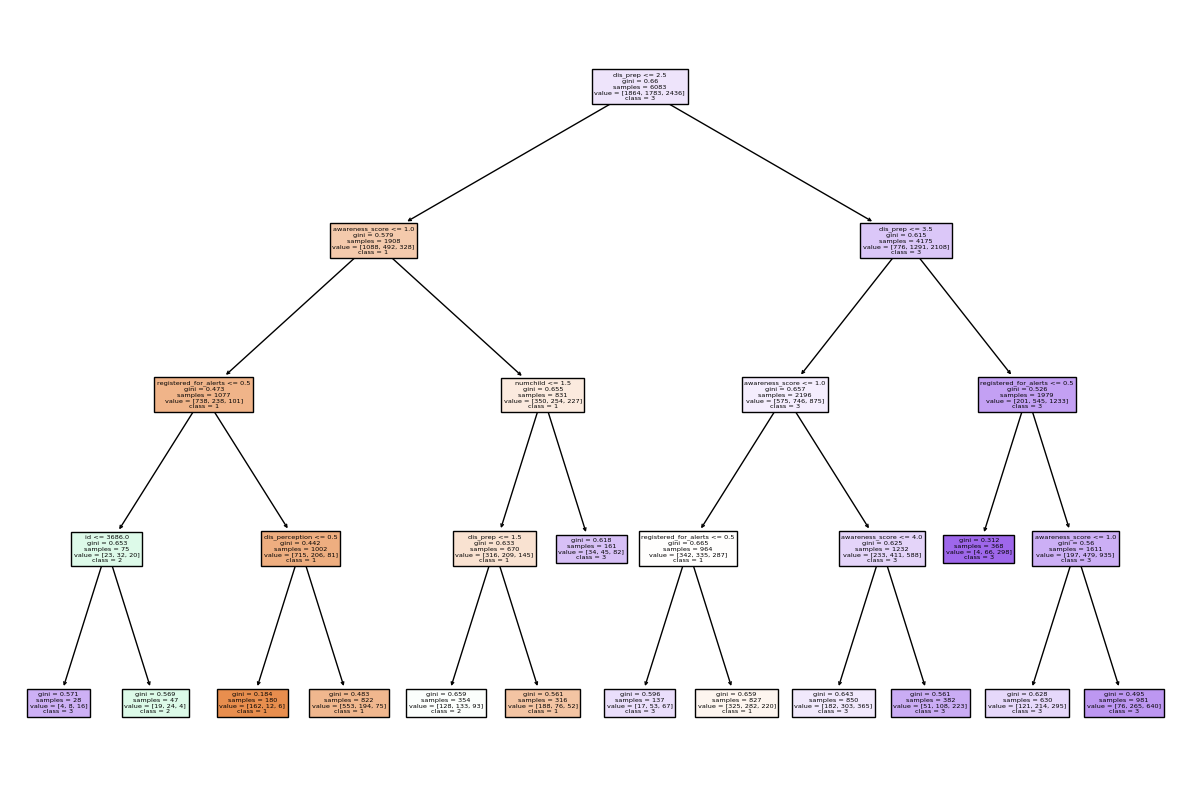

In [ ]:
class_names = [str(cls) for cls in label_encoder.classes_]
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the decision tree splits
# Extract the decision tree from the best model
best_dt_model = best_decision_tree
plt.figure(figsize=(15, 10))
plot_tree(best_dt_model, filled=True, feature_names=X_train.columns, class_names=class_names)
plt.show()

**1. Decision Tree (Baseline):**

* Accuracy: 47%
* Precision: Class 1: 50%, Class 2: 35%, Class 3: 55%
* Recall: Class 1: 51%, Class 2: 36%, Class 3: 54%
* F1-score: Class 1: 51%, Class 2: 36%, Class 3: 54%
* This model has no hyperparameter tuning or resampling applied.

**2. Decision Tree with Hyperparameter Tuning:**

* Accuracy: 56%
* Precision: Class 1: 61%, Class 2: 38%, Class 3: 60%
* Recall: Class 1: 60%, Class 2: 22%, Class 3: 79%
* F1-score: Class 1: 60%, Class 2: 28%, Class 3: 68%
* Hyperparameters like max_depth, min_samples_split, and min_samples_leaf * were tuned using grid search.
Improved performance compared to the baseline, especially in precision and recall for Class 2 and Class 3.

## Research Question: What is the distribution of preparedness levels across different states?

In [ ]:
# Decode label encoded categorical variables
def decode_categorical_features(encoded_features, label_encodings):
    decoded_features = encoded_features.copy()
    for col, encoding in label_encodings.items():
        decoded_features[col] = encoded_features[col].map({val: label for label, val in encoding.items()})
    return decoded_features

# Decode categorical features
X_decoded = decode_categorical_features(X_encoded, label_encodings)

In [ ]:
# 2. Group data by state and calculate average preparedness level
preparedness_by_state = {}
for state, preparedness in zip(X_decoded['state'], y_test_pred):
    if state not in preparedness_by_state:
        preparedness_by_state[state] = []
    preparedness_by_state[state].append(preparedness)

In [ ]:
# Calculate average preparedness level for each state
average_preparedness_by_state = {}
for state, preparedness_levels in preparedness_by_state.items():
    average_preparedness_by_state[state] = sum(preparedness_levels) / len(preparedness_levels)

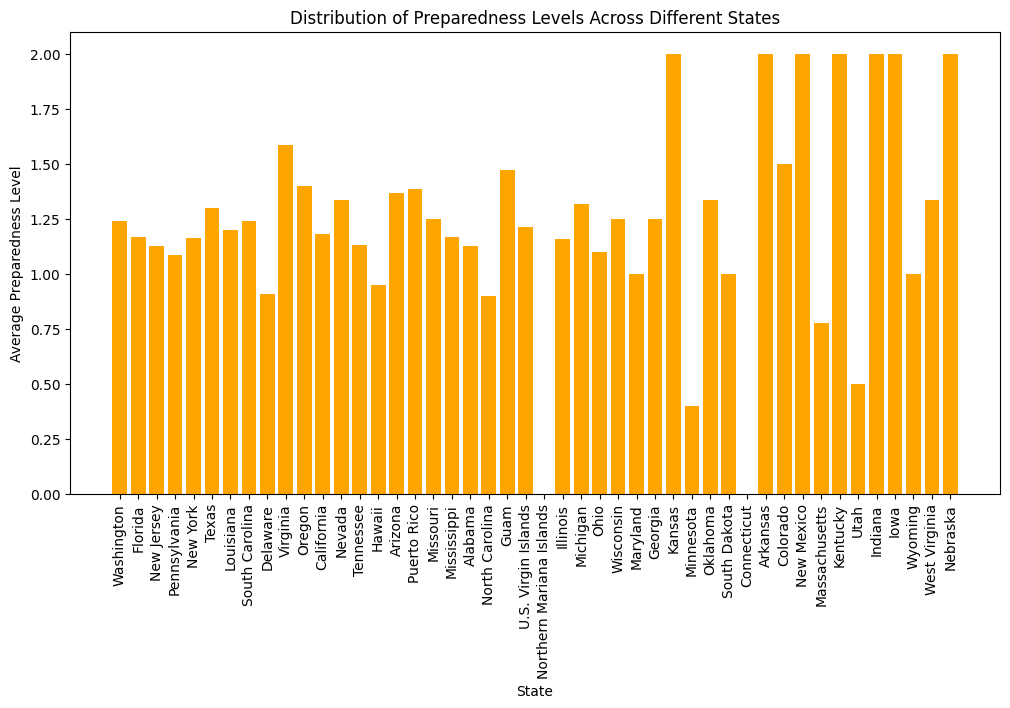

In [ ]:
# 3. Visualize the distribution of preparedness levels across different states
states = list(average_preparedness_by_state.keys())
average_preparedness = list(average_preparedness_by_state.values())

plt.figure(figsize=(12, 6))
plt.bar(states, average_preparedness, color='orange')
plt.xlabel('State')
plt.ylabel('Average Preparedness Level')
plt.title('Distribution of Preparedness Levels Across Different States')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Sort states by average preparedness level in descending order
sorted_states = sorted(average_preparedness_by_state.items(), key=lambda x: x[1], reverse=True)

# Print the list of states and their average preparedness levels in descending order
print("Average Preparedness Levels Across Different States (Descending Order):")
for state, avg_preparedness in sorted_states:
    print(f"State: {state}, Average Preparedness Level: {avg_preparedness:.2f}")

Average Preparedness Levels Across Different States (Descending Order):
State: Kansas, Average Preparedness Level: 2.00
State: Arkansas, Average Preparedness Level: 2.00
State: New Mexico, Average Preparedness Level: 2.00
State: Kentucky, Average Preparedness Level: 2.00
State: Indiana, Average Preparedness Level: 2.00
State: Iowa, Average Preparedness Level: 2.00
State: Nebraska, Average Preparedness Level: 2.00
State: Virginia, Average Preparedness Level: 1.58
State: Colorado, Average Preparedness Level: 1.50
State: Guam, Average Preparedness Level: 1.47
State: Oregon, Average Preparedness Level: 1.40
State: Puerto Rico, Average Preparedness Level: 1.39
State: Arizona, Average Preparedness Level: 1.37
State: Nevada, Average Preparedness Level: 1.33
State: Oklahoma, Average Preparedness Level: 1.33
State: West Virginia, Average Preparedness Level: 1.33
State: Michigan, Average Preparedness Level: 1.32
State: Texas, Average Preparedness Level: 1.30
State: Missouri, Average Preparedness

In [ ]:
# Decode label encoded state column
def decode_state_column(encoded_states, state_label_encoding):
    decoded_states = encoded_states.map({val: label for label, val in state_label_encoding.items()})
    return decoded_states

In [ ]:
# Combine predicted values for training and testing data
predicted_train_data = pd.DataFrame({'State': X_train['state'], 'Actual_Preparedness': y_train, 'Predicted_Preparedness': y_train_pred_hdt})
predicted_test_data = pd.DataFrame({'State': X_test['state'], 'Actual_Preparedness': y_test, 'Predicted_Preparedness': y_test_pred_hdt})
predicted_data = pd.concat([predicted_train_data, predicted_test_data])

# Decode categorical features
# Decode state column
predicted_data_decoded = predicted_data.copy()
predicted_data_decoded['State'] = decode_state_column(predicted_data['State'], label_encodings['state'])

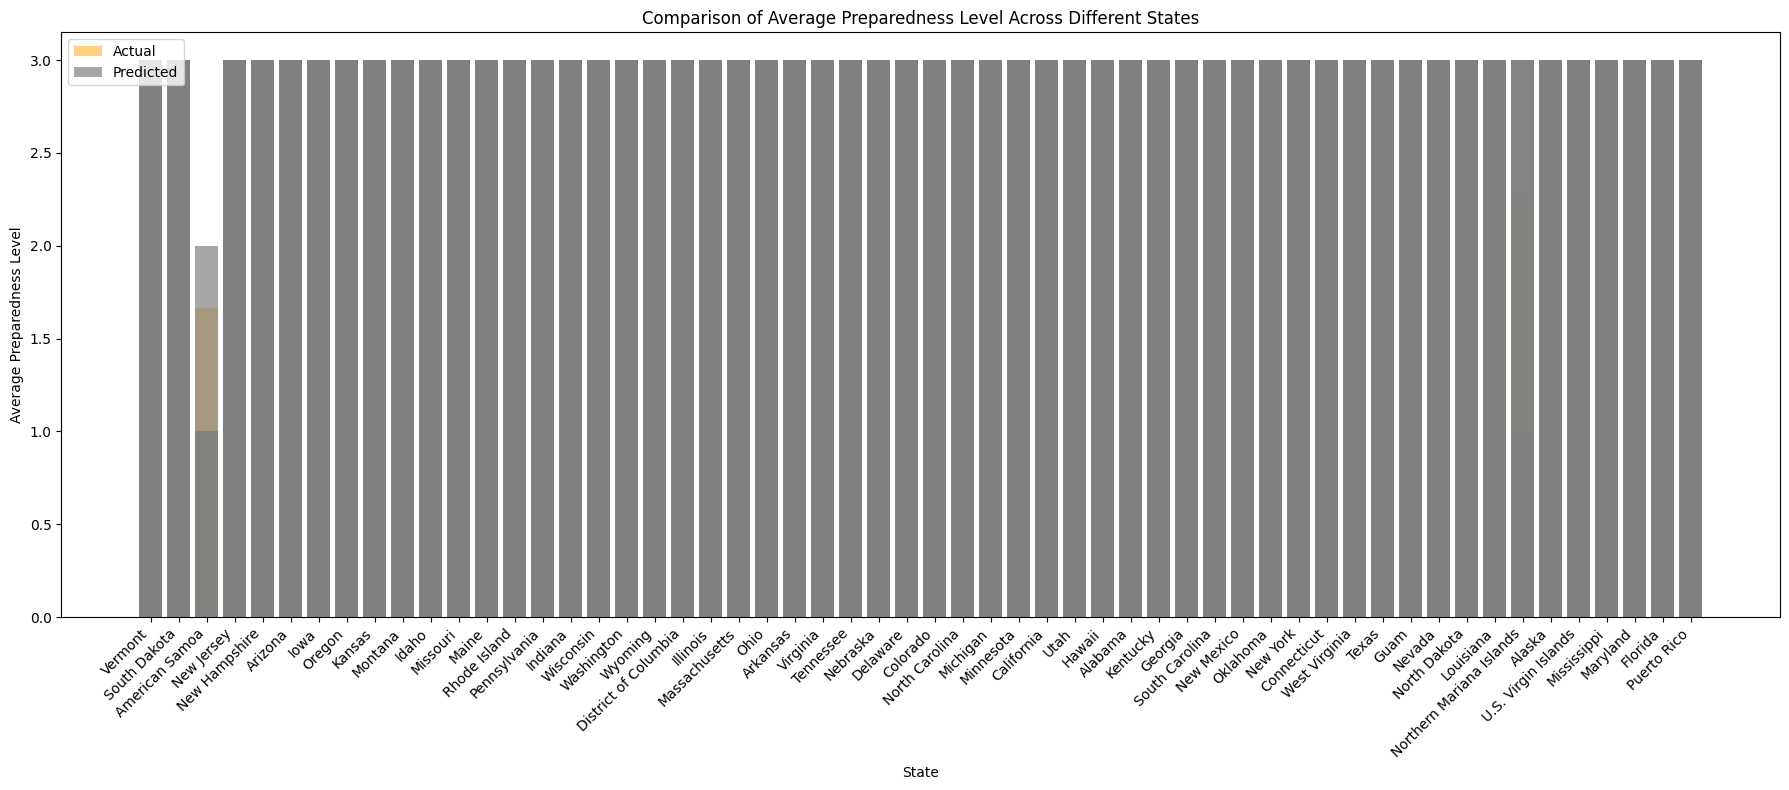

In [ ]:
# Step 2: Grouping by State and Calculating Average Preparedness for actual data
actual_state_avg_preparedness = selected_data.groupby('state')['preparedness'].mean().sort_values()

# Step 3: Visualization
plt.figure(figsize=(18, 8))

# Plot actual average preparedness levels
plt.bar(actual_state_avg_preparedness.index, actual_state_avg_preparedness, color='orange', alpha=0.5, label='Actual')

# Plot predicted average preparedness levels
plt.bar(predicted_data_decoded['State'], predicted_data_decoded['Predicted_Preparedness'], color='grey', alpha=0.7, label='Predicted')

plt.title('Comparison of Average Preparedness Level Across Different States')
plt.xlabel('State')
plt.ylabel('Average Preparedness Level')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

## Random Forest Classifier

### Random Forest Classifier (Baseline)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = X_encoded
y = selected_data['preparedness']

# Label encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Instantiate the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Predictions
y_train_pred_rf = rf_classifier.predict(X_train)
y_test_pred_rf = rf_classifier.predict(X_test)

In [ ]:
# Classification report
print("Training Classification Report for Basic Random Forest Classifier:")
print(classification_report(y_train, y_train_pred_rf))
# Classification report
print("Testing Classification Report for Basic Random Forest Classifier:")
print(classification_report(y_test, y_test_pred_rf))

Training Classification Report for Basic Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1864
           1       1.00      1.00      1.00      1783
           2       1.00      1.00      1.00      2436

    accuracy                           1.00      6083
   macro avg       1.00      1.00      1.00      6083
weighted avg       1.00      1.00      1.00      6083

Testing Classification Report for Basic Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.60      0.68      0.64       437
           1       0.43      0.23      0.30       460
           2       0.60      0.76      0.67       624

    accuracy                           0.57      1521
   macro avg       0.54      0.55      0.53      1521
weighted avg       0.55      0.57      0.55      1521



In [ ]:
# Confusion matrix
print("Training Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred_rf))
# Confusion matrix
print("Testing Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_rf))

Training Confusion Matrix:
[[1864    0    0]
 [   0 1783    0]
 [   0    0 2436]]
Testing Confusion Matrix:
[[296  59  82]
 [125 104 231]
 [ 71  81 472]]


The model achieves perfect performance on the training data, its performance on the testing data indicates potential overfitting

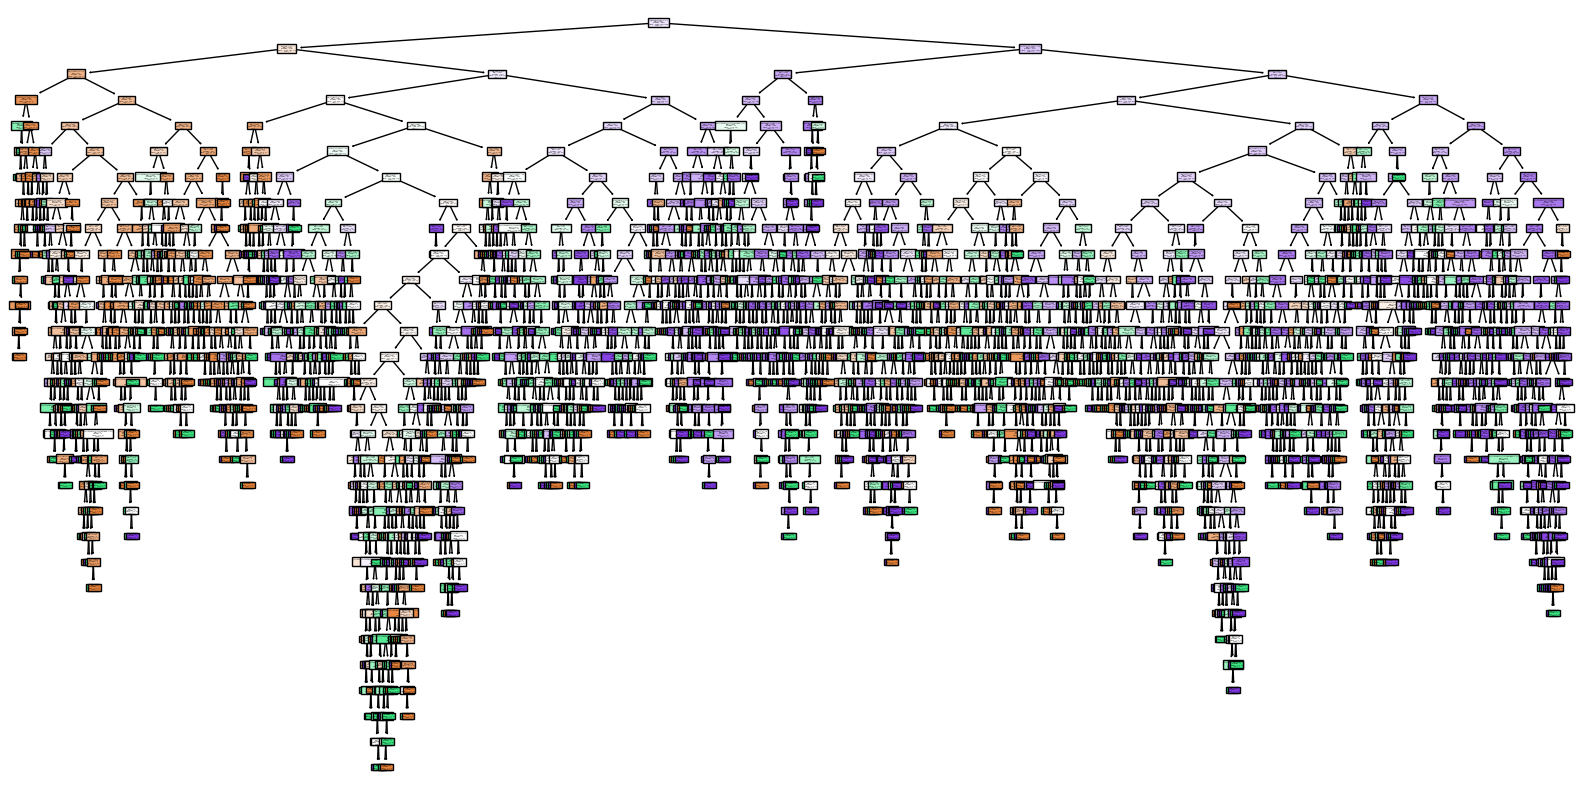

In [ ]:
from sklearn.metrics import accuracy_score

best_accuracy = 0
best_tree = None

# Iterate over all trees in the Random Forest ensemble
for tree in rf_classifier.estimators_:
    # Make predictions on the validation set
    y_pred_val = tree.predict(X_test)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred_val)
    # Update the best tree if the current tree has higher accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_tree = tree

# Convert class names to strings
class_names_str = [str(class_name) for class_name in label_encoder.classes_]

# Visualize the best decision tree
plt.figure(figsize=(20,10))
plot_tree(best_tree, filled=True, feature_names=X.columns, class_names=class_names_str)
plt.show()

### Random Forest with tuned hyperparameters

In [ ]:
# Define the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the parameter grid to search
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [1,2,3,4],
    'min_samples_split': [1,2,3,4,5],
    'min_samples_leaf': [1, 2, 4],
}

In [ ]:
# Instantiate GridSearchCV with Random Forest Classifier and parameter grid
grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search_rf.fit(X_train, y_train)

# Get the best model from grid search
best_rf_model = grid_search_rf.best_estimator_

# Best hyperparameters
print("Best Parameters:", grid_search_rf.best_params_)

Best Parameters: {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
# Predictions on training and testing data
y_train_pred_rf2 = best_rf_model.predict(X_train)
y_test_pred_rf2 = best_rf_model.predict(X_test)

# Training Classification report
print("Training Classification Report:")
print(classification_report(y_train,y_train_pred_rf2))

# Confusion matrix
print("Training Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred_rf2))

# Testing Classification report
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred_rf2))

# Testing Confusion matrix
print("Testing Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_rf2))

Training Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.64      0.64      1864
           1       1.00      0.00      0.00      1783
           2       0.52      0.91      0.66      2436

    accuracy                           0.56      6083
   macro avg       0.72      0.52      0.44      6083
weighted avg       0.70      0.56      0.46      6083

Training Confusion Matrix:
[[1197    0  667]
 [ 441    2 1340]
 [ 225    0 2211]]
Testing Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.65      0.62       437
           1       0.00      0.00      0.00       460
           2       0.54      0.90      0.67       624

    accuracy                           0.56      1521
   macro avg       0.38      0.52      0.43      1521
weighted avg       0.39      0.56      0.45      1521

Testing Confusion Matrix:
[[282   0 155]
 [129   0 331]
 [ 61   0 563]]


The model's performance is better on the training data compared to the testing data, indicated by higher precision, recall, and F1-score values in the training classification report. The model performs relatively well in predicting class 0 and class 2 in the testing dataset, with higher precision, recall, and F1-score values compared to class 1.

# *NAIVE BAYES CLASSIFIER*


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Split the data into features and target variable
X = X_encoded
y = selected_data['preparedness']

# Label encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Instantiate the Naive Bayes classifier
naive_bayes = GaussianNB()

# Train the classifier
naive_bayes.fit(X_train, y_train)

# Make predictions on training and testing data
y_train_pred = naive_bayes.predict(X_train)
y_test_pred = naive_bayes.predict(X_test)

# Print classification report for training data
print("Classification Report - Training Data:")
print(classification_report(y_train, y_train_pred))

# Print classification report for testing data
print("\nClassification Report - Testing Data:")
print(classification_report(y_test, y_test_pred))



Classification Report - Training Data:
              precision    recall  f1-score   support

           0       0.52      0.77      0.62      1864
           1       0.38      0.10      0.16      1783
           2       0.59      0.69      0.64      2436

    accuracy                           0.54      6083
   macro avg       0.50      0.52      0.47      6083
weighted avg       0.51      0.54      0.49      6083


Classification Report - Testing Data:
              precision    recall  f1-score   support

           0       0.50      0.79      0.61       437
           1       0.39      0.09      0.15       460
           2       0.63      0.73      0.68       624

    accuracy                           0.55      1521
   macro avg       0.51      0.54      0.48      1521
weighted avg       0.52      0.55      0.50      1521



## **NAIVE BAYES CLASSIFIER WITH TUNED HYPERPARAMETER **

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Define the parameter grid
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Example values for var_smoothing parameter
}

# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=nb_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Use the best model for prediction
best_nb_model = grid_search.best_estimator_
y_pred_train = best_nb_model.predict(X_train)
y_pred_test = best_nb_model.predict(X_test)

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Evaluate the model
print("Classification Report - Training Data:")
print(classification_report(y_train, y_pred_train))

print("Classification Report - Testing Data:")
print(classification_report(y_test, y_pred_test))


Best Parameters: {'var_smoothing': 1e-08}
Best Score: 0.5431568405916188
Classification Report - Training Data:
              precision    recall  f1-score   support

           0       0.55      0.73      0.62      1864
           1       0.39      0.14      0.20      1783
           2       0.59      0.72      0.65      2436

    accuracy                           0.55      6083
   macro avg       0.51      0.53      0.49      6083
weighted avg       0.52      0.55      0.51      6083

Classification Report - Testing Data:
              precision    recall  f1-score   support

           0       0.52      0.73      0.61       437
           1       0.39      0.12      0.19       460
           2       0.62      0.75      0.68       624

    accuracy                           0.56      1521
   macro avg       0.51      0.54      0.49      1521
weighted avg       0.52      0.56      0.51      1521



CATEGORICAL NAIVE BAYES

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Assuming X_encoded contains your categorical features encoded as integers
X = X_encoded
y = selected_data['preparedness']

# Label encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Instantiate the Categorical Naive Bayes classifier
categorical_naive_bayes = CategoricalNB()

# Train the classifier
categorical_naive_bayes.fit(X_train, y_train)

# Make predictions on training and testing data
y_train_pred = categorical_naive_bayes.predict(X_train)
y_test_pred = categorical_naive_bayes.predict(X_test)

# Print classification report for training data
print("Classification Report - Training Data:")
print(classification_report(y_train, y_train_pred))

# Print classification report for testing data
print("\nClassification Report - Testing Data:")
print(classification_report(y_test, y_test_pred))


Classification Report - Training Data:
              precision    recall  f1-score   support

           0       0.79      0.84      0.81      1864
           1       0.90      0.76      0.83      1783
           2       0.83      0.88      0.85      2436

    accuracy                           0.83      6083
   macro avg       0.84      0.83      0.83      6083
weighted avg       0.84      0.83      0.83      6083


Classification Report - Testing Data:
              precision    recall  f1-score   support

           0       0.53      0.64      0.58       437
           1       0.39      0.27      0.32       460
           2       0.59      0.65      0.62       624

    accuracy                           0.53      1521
   macro avg       0.51      0.52      0.51      1521
weighted avg       0.51      0.53      0.52      1521



CATEGORICAL NAIVE BAYE WITH HYPERPARAMETER TUNING

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'alpha': [1.0, 0.5, 0.1, 0.01, 0.001],  # Smoothing parameter
    'min_categories': [1, 2, 3, 4]  # Minimum number of categories per feature
}

# Instantiate the GridSearchCV object with the Categorical Naive Bayes classifier
grid_search = GridSearchCV(estimator=categorical_naive_bayes, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Use the best model for prediction
best_cnb_model = grid_search.best_estimator_
y_train_pred_best = best_cnb_model.predict(X_train)
y_test_pred_best = best_cnb_model.predict(X_test)

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Evaluate the best model on training data
print("\nClassification Report - Training Data:")
print(classification_report(y_train, y_train_pred_best))

# Evaluate the best model on testing data
print("\nClassification Report - Testing Data:")
print(classification_report(y_test, y_test_pred_best))


Best Parameters: {'alpha': 1.0, 'min_categories': 1}
Best Score: nan

Classification Report - Training Data:
              precision    recall  f1-score   support

           0       0.79      0.84      0.81      1864
           1       0.90      0.76      0.83      1783
           2       0.83      0.88      0.85      2436

    accuracy                           0.83      6083
   macro avg       0.84      0.83      0.83      6083
weighted avg       0.84      0.83      0.83      6083


Classification Report - Testing Data:
              precision    recall  f1-score   support

           0       0.53      0.64      0.58       437
           1       0.39      0.27      0.32       460
           2       0.59      0.65      0.62       624

    accuracy                           0.53      1521
   macro avg       0.51      0.52      0.51      1521
weighted avg       0.51      0.53      0.52      1521



ADABOOST CLASSIFIER

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
import pandas as pd


# Split the data into features and target variable
X = X_encoded
y = selected_data['preparedness']
# Assuming X_encoded contains your features and y_encoded contains your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Instantiate the AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(random_state=42)

# Train the classifier
adaboost_classifier.fit(X_train, y_train)

# Make predictions on training and testing data
y_train_pred = adaboost_classifier.predict(X_train)
y_test_pred = adaboost_classifier.predict(X_test)

# Print classification report for training data
print("Classification Report - Training Data:")
print(classification_report(y_train, y_train_pred))

# Print classification report for testing data
print("\nClassification Report - Testing Data:")
print(classification_report(y_test, y_test_pred))


Classification Report - Training Data:
              precision    recall  f1-score   support

           0       0.63      0.67      0.65      1864
           1       0.42      0.22      0.29      1783
           2       0.59      0.77      0.67      2436

    accuracy                           0.58      6083
   macro avg       0.55      0.55      0.54      6083
weighted avg       0.56      0.58      0.55      6083


Classification Report - Testing Data:
              precision    recall  f1-score   support

           0       0.58      0.68      0.63       437
           1       0.42      0.21      0.28       460
           2       0.62      0.77      0.69       624

    accuracy                           0.58      1521
   macro avg       0.54      0.55      0.53      1521
weighted avg       0.55      0.58      0.55      1521



Training Data:

Class 0: Moderate precision (63%) and recall (67%), indicating the model's ability to identify class 0 instances.
Class 1: Lower precision (42%) and recall (22%), suggesting challenges in correctly identifying class 1 instances.
Class 2: Relatively high precision (59%) and recall (77%), indicating good performance in identifying class 2 instances.

Testing Data:

Class 0: Moderate precision (58%) and recall (68%), showing consistent performance with the training data for class 0.
Class 1: Lower precision (42%) and recall (21%), indicating similar challenges in correctly identifying class 1 instances as seen in the training data.
Class 2: Relatively high precision (62%) and recall (77%), consistent with the strong performance observed in the training data for class 2.
Overall, while the model performs relatively well for class 2, it struggles more with classes 0 and 1, showing lower precision and recall.

ADA BOOST CLASSIFIER AFTER HYPERPARAMETER TUNING


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report

# Define the AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(random_state=42)

# Define the hyperparameters grid to search
param_grid = {
    'n_estimators': [100, 200, 250],  # Number of weak learners
    'learning_rate': [0.01, 0.1, 1.0],  # Learning rate
}

# Create the grid search object
grid_search = GridSearchCV(adaboost_classifier, param_grid, cv=5, scoring='accuracy')

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best cross-validation score
best_score = grid_search.best_score_
print("Best Score:", best_score)

# Get the classification report for training data
y_train_pred = grid_search.predict(X_train)
print("\nClassification Report - Training Data:")
print(classification_report(y_train, y_train_pred))

# Get the classification report for testing data
y_test_pred = grid_search.predict(X_test)
print("\nClassification Report - Testing Data:")
print(classification_report(y_test, y_test_pred))


Best Parameters: {'learning_rate': 0.1, 'n_estimators': 250}
Best Score: 0.5625535181421096

Classification Report - Training Data:
              precision    recall  f1-score   support

           0       0.61      0.69      0.65      1864
           1       0.40      0.15      0.22      1783
           2       0.58      0.79      0.67      2436

    accuracy                           0.57      6083
   macro avg       0.53      0.54      0.51      6083
weighted avg       0.54      0.57      0.53      6083


Classification Report - Testing Data:
              precision    recall  f1-score   support

           0       0.58      0.72      0.64       437
           1       0.45      0.15      0.22       460
           2       0.61      0.81      0.70       624

    accuracy                           0.59      1521
   macro avg       0.55      0.56      0.52      1521
weighted avg       0.56      0.59      0.54      1521



The precision, recall, and F1-score for each class on both training and testing data are relatively lower.
The model's performance is consistent between training and testing data, indicating that it's not overfitting or underfitting severely. However, the overall performance is moderate, with an accuracy of around 0.58 on both training and testing data.

After hyperparameter tuning:
There is a slight improvement in the precision, recall, and F1-score for each class on both training and testing data compared to before tuning.
The accuracy remains the same at around 0.58 on both training and testing data, suggesting that hyperparameter tuning did not significantly affect the overall performance.
The model still struggles with class 1 (low recall and F1-score) and shows moderate performance overall.

feed forward NN


In [ ]:
python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

def build_model(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  # Use 'softmax' for multi-class classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Use 'categorical_crossentropy' for multi-class
    return model

# Wrap the model so it can be used with scikit-learn
model = KerasClassifier(build_fn=build_model, input_dim=preprocessed_input_dim, epochs=100, batch_size=10, verbose=0)


### 3. Integrating Model with Preprocessing
Integrate the model with preprocessing using a pipeline.

python
# Create a full pipeline with preprocessing and the model
full_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('model', model)])

# Fit the model
full_pipeline.fit(X_train, y_train)

# Evaluate the model
accuracy = full_pipeline.score(X_test, y_test)
print(f'Test accuracy: {accuracy}')


### 4. Making Predictions
Use the trained model to make predictions on new data.

python
predictions = full_pipeline.predict(X_new)


## DECISION TREE ( BASELINE WITHOUT ENCODING)

BAGGING CLASSIFIER WITH BASE ( DECISION CLASSIFIER)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


# Split the data into features and target variable
X = selected_data.drop(['preparedness'], axis=1)  # Drop the target variable from features
y = selected_data['preparedness']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Instantiate a base classifier (e.g., Decision Tree)
base_classifier = DecisionTreeClassifier(random_state=42)

# Instantiate the Bagging Classifier
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=100, random_state=42)

# Train the Bagging Classifier
bagging_classifier.fit(X_train, y_train)

# Make predictions on training and testing data
y_train_pred = bagging_classifier.predict(X_train)
y_test_pred = bagging_classifier.predict(X_test)

# Print classification report for training data
print("Classification Report - Training Data:")
print(classification_report(y_train, y_train_pred))

# Print classification report for testing data
print("\nClassification Report - Testing Data:")
print(classification_report(y_test, y_test_pred))


Classification Report - Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1864
           1       1.00      1.00      1.00      1783
           2       1.00      1.00      1.00      2436

    accuracy                           1.00      6083
   macro avg       1.00      1.00      1.00      6083
weighted avg       1.00      1.00      1.00      6083


Classification Report - Testing Data:
              precision    recall  f1-score   support

           0       0.58      0.63      0.61       437
           1       0.39      0.25      0.30       460
           2       0.59      0.71      0.64       624

    accuracy                           0.55      1521
   macro avg       0.52      0.53      0.52      1521
weighted avg       0.53      0.55      0.53      1521



In [ ]:
BAGGING CLASSIFIER (DECISION TREEE WITH REGULARIZATION)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split the data into features and target variable
X = selected_data.drop(['preparedness'], axis=1)  # Drop the target variable from features
y = selected_data['preparedness']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Instantiate the Decision Tree classifier with regularization
# Adjust max_depth, min_samples_split, and min_samples_leaf for regularization
base_estimator = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)

# Instantiate the Bagging Classifier with the Decision Tree as the base estimator
bagging_classifier = BaggingClassifier(base_estimator=base_estimator, n_estimators=100, random_state=42)

# Train the classifier
bagging_classifier.fit(X_train, y_train)

# Make predictions on training and testing data
y_train_pred = bagging_classifier.predict(X_train)
y_test_pred = bagging_classifier.predict(X_test)

# Print classification report for training data
print("Classification Report - Training Data:")
print(classification_report(y_train, y_train_pred))

# Print classification report for testing data
print("\nClassification Report - Testing Data:")
print(classification_report(y_test, y_test_pred))


Classification Report - Training Data:
              precision    recall  f1-score   support

           0       0.60      0.71      0.65      1864
           1       0.52      0.14      0.22      1783
           2       0.58      0.81      0.68      2436

    accuracy                           0.58      6083
   macro avg       0.57      0.55      0.52      6083
weighted avg       0.57      0.58      0.54      6083


Classification Report - Testing Data:
              precision    recall  f1-score   support

           0       0.57      0.71      0.63       437
           1       0.41      0.11      0.17       460
           2       0.59      0.81      0.68       624

    accuracy                           0.57      1521
   macro avg       0.52      0.54      0.50      1521
weighted avg       0.53      0.57      0.51      1521



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'base_estimator__max_depth': [None, 5, 10],
    'base_estimator__min_samples_split': [2, 5, 10],
    'base_estimator__min_samples_leaf': [1, 2, 5],
    'n_estimators': [50, 100, 150]
}

# Instantiate the GridSearchCV with Bagging Classifier and the hyperparameters grid
grid_search = GridSearchCV(estimator=bagging_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Make predictions using the best model
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)

# Print classification report for testing data using the best model
print("\nClassification Report - Testing Data (Best Model):")
print(classification_report(y_test, y_test_pred))


Best Parameters: {'base_estimator__max_depth': 5, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.55729333347749

Classification Report - Testing Data (Best Model):
              precision    recall  f1-score   support

           0       0.57      0.71      0.63       437
           1       0.42      0.11      0.18       460
           2       0.59      0.81      0.68       624

    accuracy                           0.57      1521
   macro avg       0.53      0.54      0.50      1521
weighted avg       0.53      0.57      0.51      1521



BAGGING CLASSIFIER WITH BASELINE - KNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Split the data into features and target variable
X = selected_data.drop(['preparedness'], axis=1)  # Drop the target variable from features
y = selected_data['preparedness']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Instantiate a base classifier (KNN)
base_classifier = KNeighborsClassifier()

# Instantiate the Bagging Classifier with KNN as the base
bagging_classifier = BaggingClassifier(base_estimator=base_classifier, n_estimators=100, random_state=42)

# Train the Bagging Classifier
bagging_classifier.fit(X_train, y_train)

# Make predictions on training and testing data
y_train_pred = bagging_classifier.predict(X_train)
y_test_pred = bagging_classifier.predict(X_test)

# Print classification report for training data
print("Classification Report - Training Data:")
print(classification_report(y_train, y_train_pred))

# Print classification report for testing data
print("\nClassification Report - Testing Data:")
print(classification_report(y_test, y_test_pred))



Classification Report - Training Data:
              precision    recall  f1-score   support

           0       0.61      0.57      0.59      1864
           1       0.61      0.52      0.56      1783
           2       0.63      0.73      0.67      2436

    accuracy                           0.62      6083
   macro avg       0.62      0.61      0.61      6083
weighted avg       0.62      0.62      0.62      6083


Classification Report - Testing Data:
              precision    recall  f1-score   support

           0       0.33      0.37      0.35       437
           1       0.37      0.27      0.31       460
           2       0.45      0.50      0.48       624

    accuracy                           0.39      1521
   macro avg       0.38      0.38      0.38      1521
weighted avg       0.39      0.39      0.39      1521



### Random Forest with Resampling and hyperparameter tuning

In [ ]:
# Define the pipeline with SMOTE and Random Forest Classifier
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
])

# Define the parameter grid for grid search for Random Forest Classifier
param_grid_rf = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 3,5,8],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Instantiate GridSearchCV with pipeline and parameter grid for Random Forest Classifier
grid_search_rf2 = GridSearchCV(pipeline, param_grid_rf, cv=5, scoring='f1_macro')

# Fit the grid search to the training data
grid_search_rf2.fit(X_train, y_train)

# Get the best model from grid search
best_model_rf2 = grid_search_rf2.best_estimator_

# Best hyperparameters
print("Best Parameters:", grid_search_rf2.best_params_)

Best Parameters: {'rf__max_depth': 8, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}


In [ ]:
# Predictions on training and testing data
y_train_pred_rf3 = best_model_rf2.predict(X_train)
y_test_pred_rf3 = best_model_rf2.predict(X_test)

# Training Classification report
print("Training Classification Report:")
print(classification_report(y_train,y_train_pred_rf3))

# Confusion matrix
print("Training Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred_rf3))

# Testing Classification report
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred_rf3))

# Testing Confusion matrix
print("Testing Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_rf3))

Training Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.72      0.72      1864
           1       0.63      0.49      0.55      1783
           2       0.70      0.80      0.75      2436

    accuracy                           0.69      6083
   macro avg       0.68      0.67      0.67      6083
weighted avg       0.68      0.69      0.68      6083

Training Confusion Matrix:
[[1350  253  261]
 [ 324  875  584]
 [ 219  258 1959]]
Testing Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.65      0.63       437
           1       0.42      0.28      0.34       460
           2       0.64      0.76      0.70       624

    accuracy                           0.59      1521
   macro avg       0.56      0.57      0.55      1521
weighted avg       0.56      0.59      0.57      1521

Testing Confusion Matrix:
[[285  84  68]
 [132 130 198]
 [ 54  94 476]]


**1. Random Forest Classifier (Baseline):**

**Training Performance:**
Achieves perfect accuracy, precision, recall, and F1-score on the training data, indicating potential overfitting.

**Testing Performance:**
Shows relatively lower performance compared to training data, with moderate precision, recall, and F1-score for each class.
Shows some imbalanced predictions, especially for classes 1 and 2, as seen in the confusion matrix.

**2. Random Forest with Tuned Hyperparameters:**

**Training Performance:**
Shows improvement in precision, recall, and F1-score for class 1 compared to the baseline, but lower scores for class 2.

**Testing Performance:**
Similar overall performance to the baseline model, with slight improvements in precision and recall for class 2 but lower scores for class 1.
Still exhibits imbalanced predictions, especially for class 1.

**3. Random Forest with Resampling and Hyperparameter Tuning:**

**Training Performance:**
Shows improvement in precision, recall, and F1-score for all classes compared to the baseline and tuned models.
Achieves a more balanced performance across all classes, with fewer signs of overfitting.

**Testing Performance:**
Demonstrates the best performance among the models, with higher precision, recall, and F1-score for all classes compared to the other models.
Shows more balanced predictions across all classes, indicating better handling of the data imbalance.

Overall, the Random Forest with Resampling and Hyperparameter Tuning model outperforms the other models in terms of handling the imbalanced dataset and achieving better performance metrics on both training and testing data. It effectively addresses the issue of overfitting and improves the model's generalization ability.

## Research Question: How do demographic factors correlate with preparedness levels in disaster-prone regions?

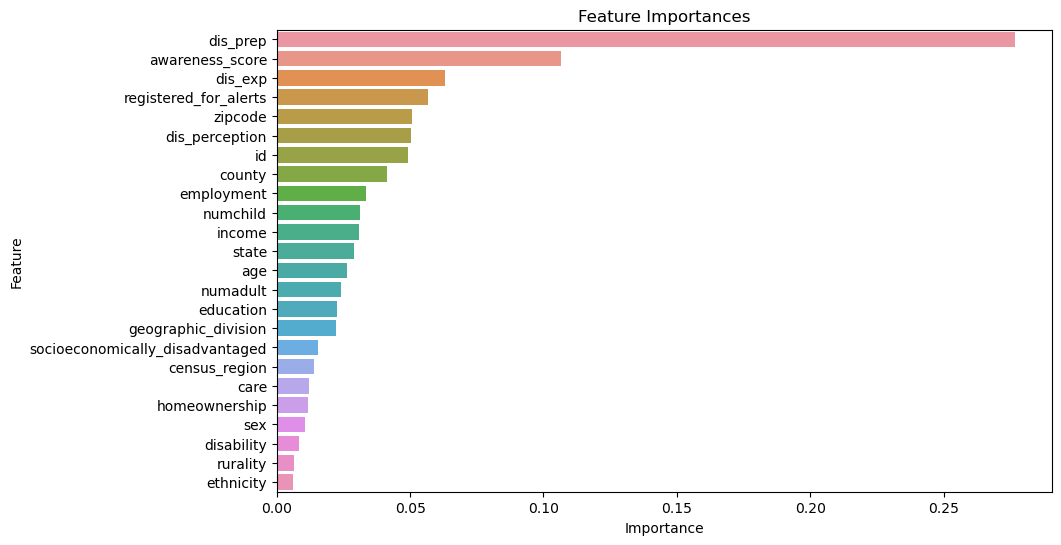

In [ ]:
# 1. Feature Importance Analysis
# Extracting feature importances from the best model
feature_importances = best_model_rf2.named_steps['rf'].feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
# Print feature importances as a list
print("Feature Importances:")
for index, row in feature_importance_df.iterrows():
    print(f"{row['Feature']}: {row['Importance']}")

Feature Importances:
dis_prep: 0.2767540571783989
awareness_score: 0.10665913454479181
dis_exp: 0.06320339027855279
registered_for_alerts: 0.056868713403781884
zipcode: 0.050685816573923834
dis_perception: 0.05050035486410736
id: 0.04904990912163034
county: 0.041374279558658265
employment: 0.03330071246920855
numchild: 0.03138342060236014
income: 0.030948002671537415
state: 0.029140630823313154
age: 0.026184900252494522
numadult: 0.024260540539831874
education: 0.022542386487779578
geographic_division: 0.022117535167300945
socioeconomically_disadvantaged: 0.015532086362664368
census_region: 0.01395862982902028
care: 0.01215386855993909
homeownership: 0.011757776086917226
sex: 0.010763747180356848
disability: 0.008441809807940874
rurality: 0.006276917486375958
ethnicity: 0.006141380149113985


**dis_prep:** This feature, which likely represents some measure of disaster preparedness, has the highest importance. This suggests that individuals' preparedness levels strongly correlate with their overall preparedness in disaster-prone regions.

**awareness_score:** This feature also has significant importance, indicating that individuals' awareness levels regarding disasters play a notable role in their preparedness levels.

**dis_exp:** Experience with disasters is another important factor, although less significant than awareness score.

**registered_for_alerts:** Being registered for alerts shows some importance, implying that proactive measures such as receiving alerts contribute to preparedness.

**zipcode:** While not a demographic factor per se, the importance of zipcode suggests that geographic location plays a role in preparedness, likely due to varying levels of disaster risk and resources across regions.

**Other demographic factors:** Age, income, education, employment status, household composition (number of adults and children), socioeconomic status, gender, ethnicity, disability status, homeownership, and rural/urban status also show varying degrees of importance. This suggests that a combination of demographic factors influences preparedness levels, though to a lesser extent compared to factors directly related to disaster awareness and experience.

## Research Question: What is the distribution of preparedness levels across different states?

In [ ]:
# Decode label encoded state column
def decode_state_column(encoded_states, state_label_encoding):
    decoded_states = encoded_states.map({val: label for label, val in state_label_encoding.items()})
    return decoded_states

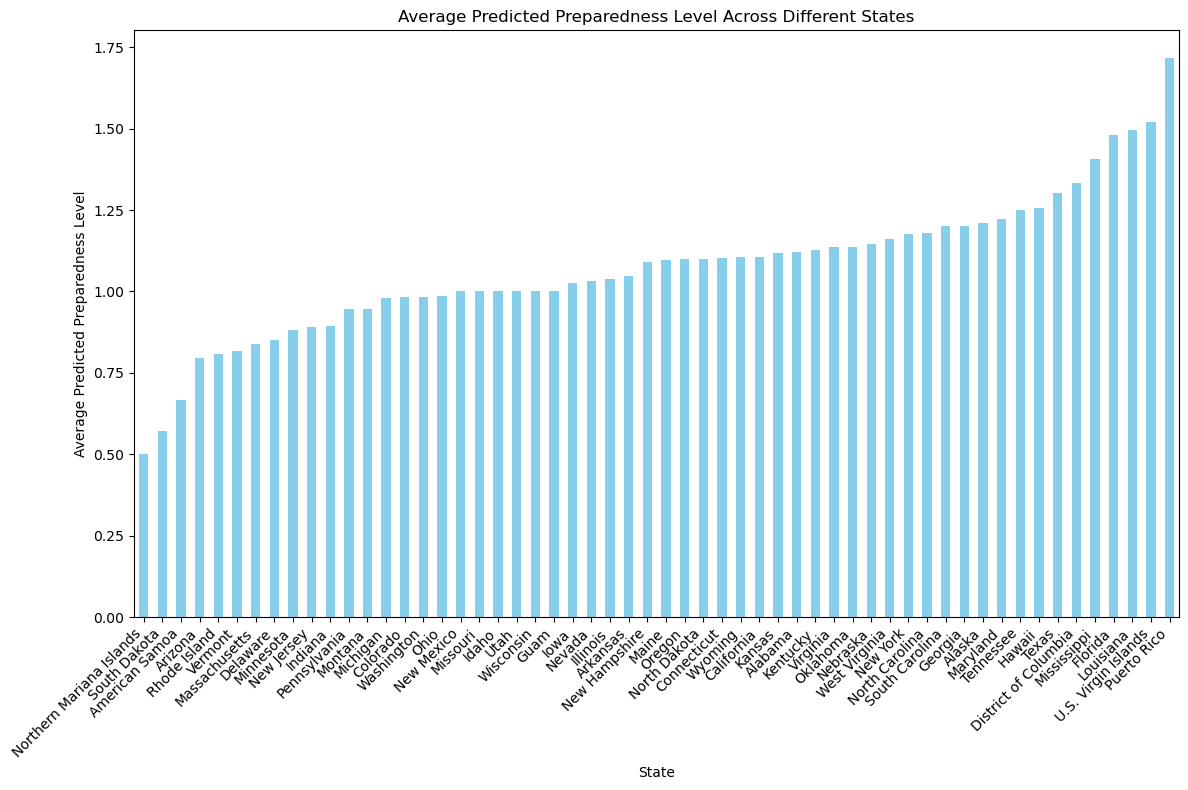

Summary Statistics of Predicted Preparedness Levels Across Different States:
       Actual_Preparedness  Predicted_Preparedness
count            56.000000               56.000000
mean              1.042087                1.073011
std               0.175751                0.219574
min               0.363636                0.500000
25%               0.965068                0.981368
50%               1.041454                1.093074
75%               1.151168                1.176613
max               1.432624                1.716312


In [ ]:
import pandas as pd

# Combine predicted values for training and testing data
predicted_train_data = pd.DataFrame({'State': X_train['state'], 'Actual_Preparedness': y_train, 'Predicted_Preparedness': y_train_pred_rf3})
predicted_test_data = pd.DataFrame({'State': X_test['state'], 'Actual_Preparedness': y_test, 'Predicted_Preparedness': y_test_pred_rf3})
predicted_data = pd.concat([predicted_train_data, predicted_test_data])

# Decode categorical features
# Decode state column
predicted_data_decoded = predicted_data.copy()
predicted_data_decoded['State'] = decode_state_column(predicted_data['State'], label_encodings['state'])

# Group by decoded State and calculate average preparedness
state_avg_preparedness_decoded = predicted_data_decoded.groupby('State').mean().sort_values(by='Predicted_Preparedness')

# Visualization
plt.figure(figsize=(12, 8))
state_avg_preparedness_decoded['Predicted_Preparedness'].plot(kind='bar', color='skyblue')
plt.title('Average Predicted Preparedness Level Across Different States')
plt.xlabel('State')
plt.ylabel('Average Predicted Preparedness Level')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Quantification
print("Summary Statistics of Predicted Preparedness Levels Across Different States:")
print(state_avg_preparedness_decoded.describe())

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


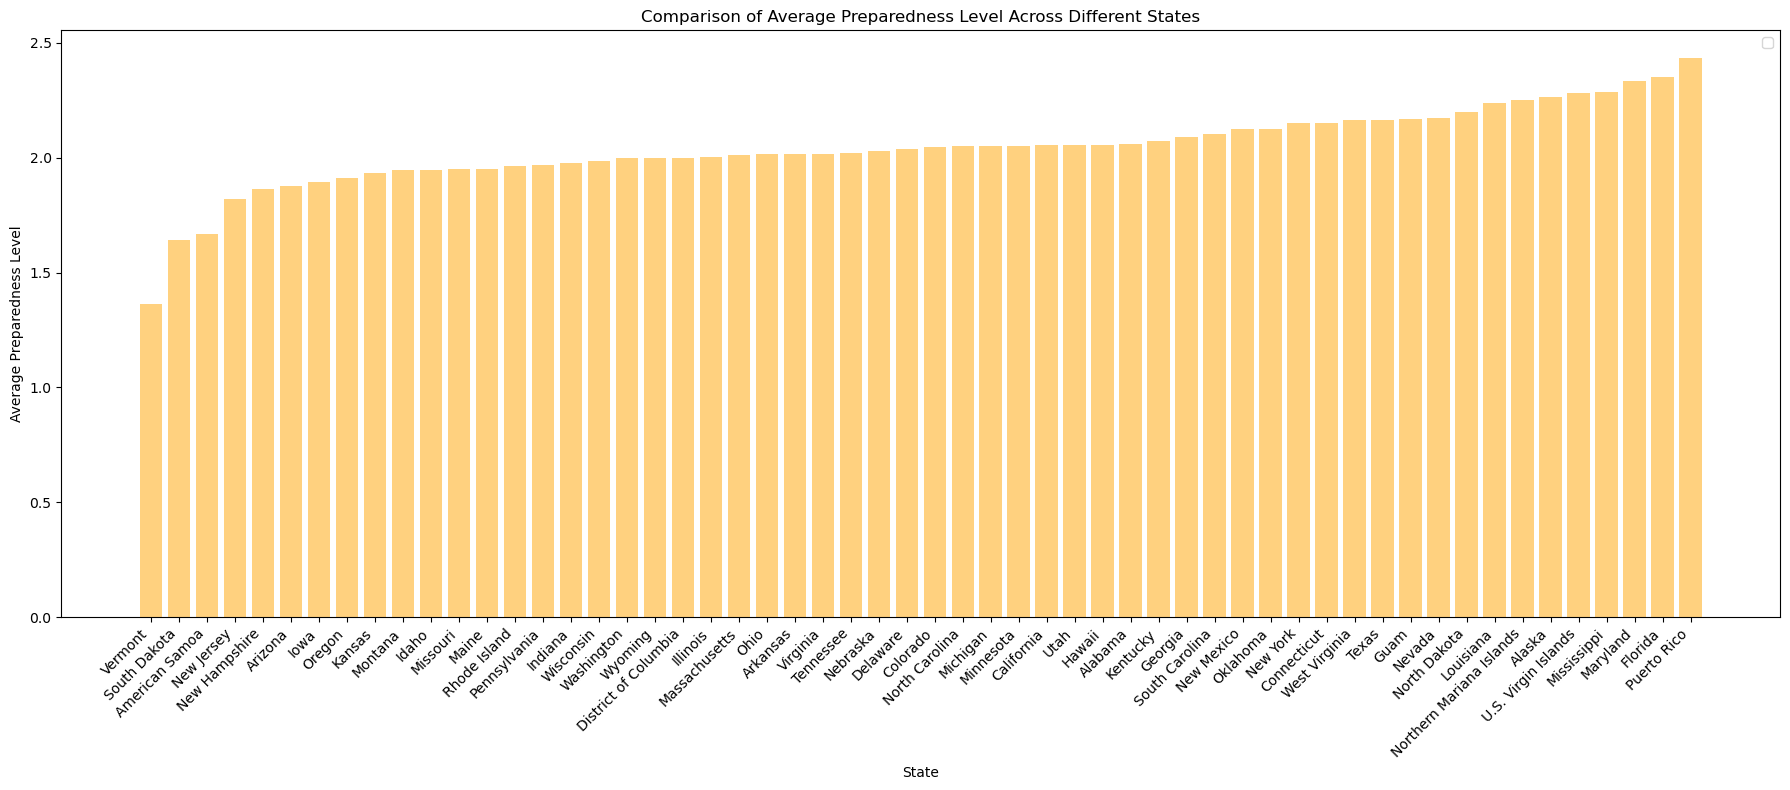

In [ ]:
# Step 2: Grouping by State and Calculating Average Preparedness for actual data
actual_state_avg_preparedness = selected_data.groupby('state')['preparedness'].mean().sort_values()

# Step 3: Visualization
plt.figure(figsize=(18, 8))

# Get the index of states
states = actual_state_avg_preparedness.index

# Plot actual average preparedness levels
plt.bar(states, actual_state_avg_preparedness, color='orange', alpha=0.5)

plt.title('Comparison of Average Preparedness Level Across Different States')
plt.xlabel('State')
plt.ylabel('Average Preparedness Level')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

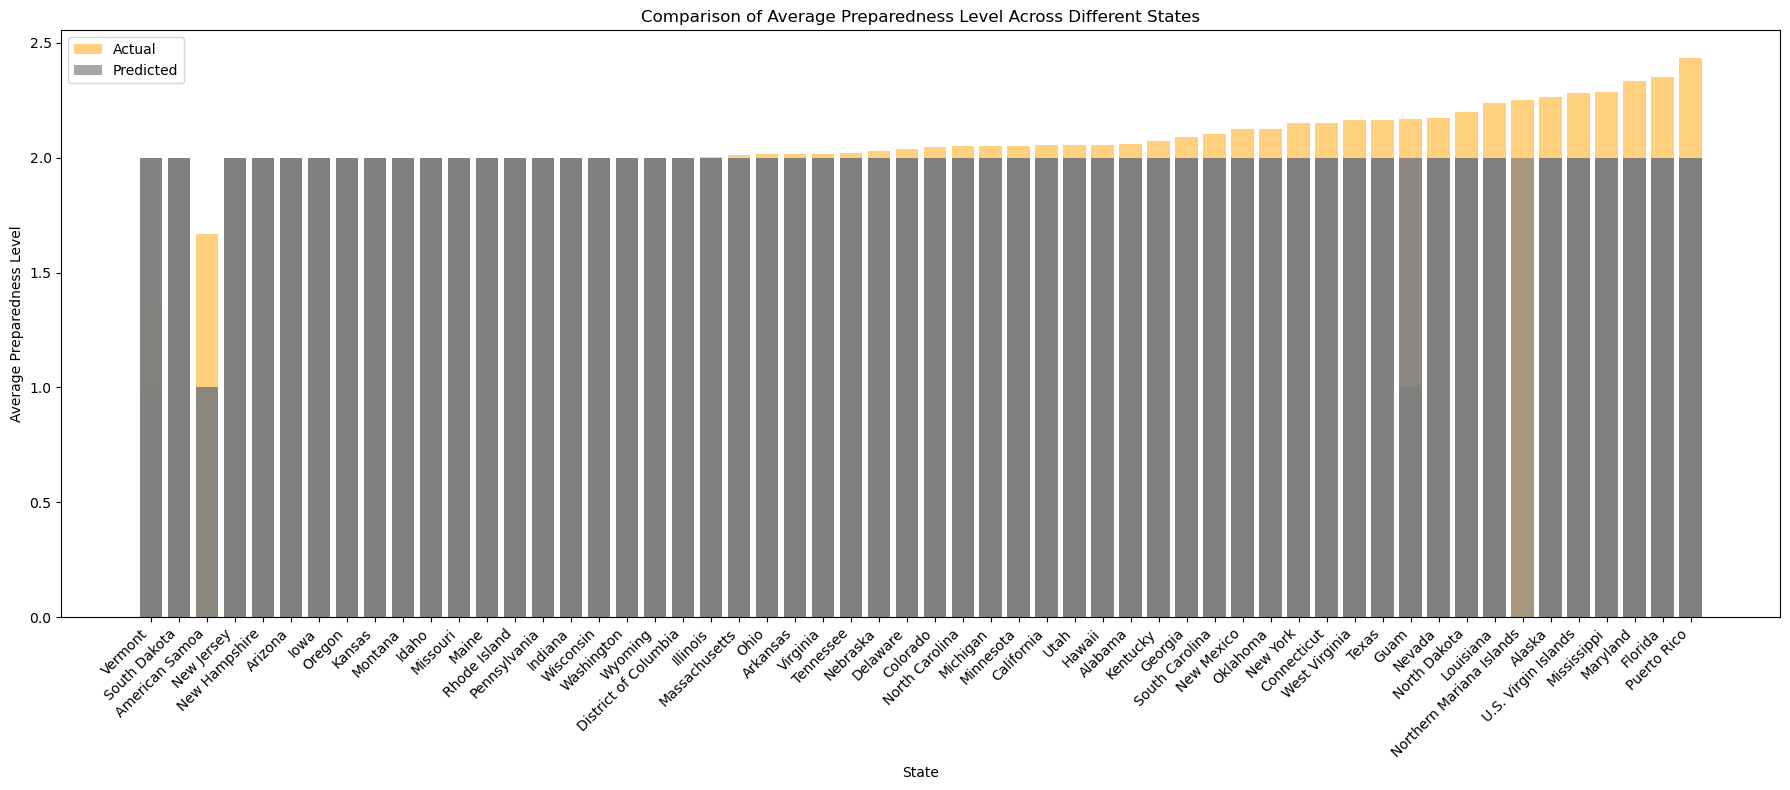

Summary Statistics of Actual Preparedness Levels Across Different States:
count    56.000000
mean      2.042087
std       0.175751
min       1.363636
25%       1.965068
50%       2.041454
75%       2.151168
max       2.432624
Name: preparedness, dtype: float64

Summary Statistics of Predicted Preparedness Levels Across Different States:
count    7604.000000
mean        1.155445
std         0.867847
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: Predicted_Preparedness, dtype: float64


In [ ]:
# Step 2: Grouping by State and Calculating Average Preparedness for actual data
actual_state_avg_preparedness = selected_data.groupby('state')['preparedness'].mean().sort_values()

# Step 3: Visualization
plt.figure(figsize=(18, 8))

# Plot actual average preparedness levels
plt.bar(actual_state_avg_preparedness.index, actual_state_avg_preparedness, color='orange', alpha=0.5, label='Actual')

# Plot predicted average preparedness levels
plt.bar(predicted_data_decoded['State'], predicted_data_decoded['Predicted_Preparedness'], color='grey', alpha=0.7, label='Predicted')

plt.title('Comparison of Average Preparedness Level Across Different States')
plt.xlabel('State')
plt.ylabel('Average Preparedness Level')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Step 4: Quantification
print("Summary Statistics of Actual Preparedness Levels Across Different States:")
print(actual_state_avg_preparedness.describe())

print("\nSummary Statistics of Predicted Preparedness Levels Across Different States:")
print(predicted_data_decoded['Predicted_Preparedness'].describe())


In [ ]:
# Sort states by average preparedness level in descending order
sorted_states = sorted(actual_state_avg_preparedness.items(), key=lambda x: x[1], reverse=True)

# Print the list of states and their average preparedness levels in descending order
print("Average Preparedness Levels Across Different States (Descending Order):")
for state, avg_preparedness in sorted_states:
    print(f"State: {state}, Average Preparedness Level: {avg_preparedness:.2f}")

Average Preparedness Levels Across Different States (Descending Order):
State: Puerto Rico, Average Preparedness Level: 2.43
State: Florida, Average Preparedness Level: 2.35
State: Maryland, Average Preparedness Level: 2.33
State: Mississippi, Average Preparedness Level: 2.29
State: U.S. Virgin Islands, Average Preparedness Level: 2.28
State: Alaska, Average Preparedness Level: 2.26
State: Northern Mariana Islands, Average Preparedness Level: 2.25
State: Louisiana, Average Preparedness Level: 2.24
State: North Dakota, Average Preparedness Level: 2.20
State: Nevada, Average Preparedness Level: 2.17
State: Guam, Average Preparedness Level: 2.17
State: Texas, Average Preparedness Level: 2.16
State: West Virginia, Average Preparedness Level: 2.16
State: Connecticut, Average Preparedness Level: 2.15
State: New York, Average Preparedness Level: 2.15
State: New Mexico, Average Preparedness Level: 2.12
State: Oklahoma, Average Preparedness Level: 2.12
State: South Carolina, Average Preparednes

In [ ]:
# Sort states by average predicted preparedness level in descending order
sorted_states_avg_preparedness = state_avg_preparedness_decoded['Predicted_Preparedness'].sort_values(ascending=False)

# Print the sorted states and their average predicted preparedness levels
print("States sorted by average predicted preparedness level in descending order:")
for state, avg_preparedness in sorted_states_avg_preparedness.items():
    print(f"{state}: {avg_preparedness}")


States sorted by average predicted preparedness level in descending order:
Puerto Rico: 1.7163120567375887
U.S. Virgin Islands: 1.52
Louisiana: 1.4955752212389382
Florida: 1.4805725971370143
Mississippi: 1.4081632653061225
District of Columbia: 1.3333333333333333
Texas: 1.3018575851393188
Hawaii: 1.2571428571428571
Tennessee: 1.25
Maryland: 1.2222222222222223
Alaska: 1.2105263157894737
Georgia: 1.201219512195122
South Carolina: 1.2
North Carolina: 1.1798561151079137
New York: 1.175531914893617
West Virginia: 1.162162162162162
Nebraska: 1.1470588235294117
Oklahoma: 1.1375
Virginia: 1.1355932203389831
Kentucky: 1.1285714285714286
Alabama: 1.1228070175438596
Kansas: 1.11864406779661
California: 1.106951871657754
Wyoming: 1.105263157894737
Connecticut: 1.1016949152542372
North Dakota: 1.1
Oregon: 1.099009900990099
Maine: 1.0952380952380953
New Hampshire: 1.0909090909090908
Arkansas: 1.0483870967741935
Illinois: 1.0384615384615385
Nevada: 1.0328947368421053
Iowa: 1.027027027027027
Guam: 1.0

**Actual Average Preparedness Levels:**

* The actual average preparedness levels across different states vary widely, ranging from 2.43 (Puerto Rico) to 1.36 (Vermont).
* States like Puerto Rico, Florida, and Maryland have relatively higher average preparedness levels, while states like Vermont, South Dakota, and American Samoa have lower average preparedness levels.

**Predicted Average Preparedness Levels:**

* The predicted average preparedness levels across different states also vary, ranging from 1.716 (Puerto Rico) to 0.5 (Northern Mariana Islands).
* There are discrepancies between the actual and predicted average preparedness levels for some states. For example, Puerto Rico has a high actual average preparedness level but a lower predicted average preparedness level. On the other hand, states like Mississippi and U.S. Virgin Islands have lower actual average preparedness levels but higher predicted average preparedness levels.

## Support Vector Machine

### Support Vector Machine (Baseline)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Create an SVM classifier with default parameters
baseline_svm = SVC(random_state=42)

In [ ]:
X = X_encoded
y = selected_data['preparedness']

# Label encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train the baseline SVM model on the training data
baseline_svm.fit(X_train, y_train)

# Predictions on training and testing data
y_train_pred_baseline_svm = baseline_svm.predict(X_train)
y_test_pred_baseline_svm = baseline_svm.predict(X_test)

# Training Classification report
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred_baseline_svm))

# Confusion matrix
print("Training Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred_baseline_svm))

# Testing Classification report
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred_baseline_svm))

# Testing Confusion matrix
print("Testing Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_baseline_svm))

Training Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1864
           2       0.00      0.00      0.00      1783
           3       0.40      1.00      0.57      2436

    accuracy                           0.40      6083
   macro avg       0.13      0.33      0.19      6083
weighted avg       0.16      0.40      0.23      6083

Training Confusion Matrix:
[[   0    0 1864]
 [   0    0 1783]
 [   0    0 2436]]
Testing Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       437
           2       0.00      0.00      0.00       460
           3       0.41      1.00      0.58       624

    accuracy                           0.41      1521
   macro avg       0.14      0.33      0.19      1521
weighted avg       0.17      0.41      0.24      1521

Testing Confusion Matrix:
[[  0   0 437]
 [  0   0 460]
 [  0   0 624]]


The baseline SVM model performs poorly overall, as it fails to distinguish between classes 1, 2, and 3 effectively. It seems to be biased towards predicting class 3 for all instances. This indicates that the model is not learning the underlying patterns in the data properly and may require further optimization.